# Проект: Обучение с учителем: качество модели

## Вводная часть

### Описание проекта
Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.

Задача: разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

### Подход к решению задачи (описание решения):
1. Нужно промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: «снизилась», если клиент стал покупать меньше товаров, и «прежний уровень».

2. Нужно собрать данные по клиентам по следующим группам:
- Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
- Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
- Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
- Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.

3. Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.
   
5. В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.

7. Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.

### Описание данных
Данные находятся в следующих таблицах:
####  `market_file.csv` - Таблица содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.
- `id` — номер покупателя в корпоративной базе данных.
- `Покупательская активность` — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- `Тип сервиса` — уровень сервиса, например «премиум» и «стандарт».
- `Разрешить сообщать` — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- `Маркет_актив_6_мес` — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- `Маркет_актив_тек_мес` — количество маркетинговых коммуникаций в текущем месяце.
- `Длительность` — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- `Акционные_покупки` — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- `Популярная_категория` — самая популярная категория товаров у покупателя за последние 6 месяцев.
- `Средний_просмотр_категорий_за_визит` — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- `Неоплаченные_продукты_штук_квартал` — общее число неоплаченных товаров в корзине за последние 3 месяца.
- `Ошибка_сервиса` — число сбоев, которые коснулись покупателя во время посещения сайта.
- `Страниц_за_визит` — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.
#### `market_money.csv` - Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.
- `id` — номер покупателя в корпоративной базе данных.
- `Период` — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- `Выручка` — сумма выручки за период.
#### `market_time.csv` - Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.
- `id` — номер покупателя в корпоративной базе данных.
- `Период` — название периода, во время которого зафиксировано общее время.
- `минут` — значение времени, проведённого на сайте, в минутах.
#### `money.csv` - Таблица с данными о среднемесячной прибыли продавца за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.
- `id` — номер покупателя в корпоративной базе данных.
- `Прибыль` — значение прибыли.


## Установка пакетов, Импорт библиотек, настройки, константы

### Установим отсутствуещие в окружении `practicum` пакеты

In [1]:
!pip install -q -U scikit-learn==1.5.2
!pip install -q shap
!pip install -q optuna
!pip install -q optuna-integration
!pip install -q phik
!pip install -q imbalanced-learn

### Импорт библиотек

In [2]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import (OneHotEncoder, OrdinalEncoder, 
    StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder)

from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer

from sklearn.metrics import roc_auc_score, accuracy_score, make_scorer

from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from phik import phik_matrix
from phik.report import plot_correlation_matrix

import shap

### Настройки по умолчанию

In [3]:
# Применим настройку формата чисел с разделителем
pd.options.display.float_format = '{:_.4f}'.format
# установим размер графиков по умолчанию
plt.rcParams["figure.figsize"] = (10, 8) 
# Установка опции для отображения максимальной ширины столбца
pd.set_option('display.max_colwidth', None)

### Константы

In [4]:
RANDOM_STATE = 42
TEST_SIZE = 0.25
PROMO_THRESHOLD = 0.5

## Загрузка данных
### Загружаем данные из файлов:
* `/datasets/market_file.csv`
* `/datasets/market_money.csv`
* `/datasets/market_time.csv`
* `/datasets/money.csv`

 Внимание: в некоторых файлах разделитель значений — точка с запятой, а разделитель десятичных значений — запятая.  

In [5]:
# Создаем переменные с датафреймами
if os.path.exists('/datasets/market_file.csv'):
    df_market = pd.read_csv('/datasets/market_file.csv')
    df_market_money = pd.read_csv('/datasets/market_money.csv')
    df_market_time = pd.read_csv('/datasets/market_time.csv')
    df_money = pd.read_csv('/datasets/money.csv', sep=';')
    
else:
    df_market = pd.read_csv('datasets/market_file.csv')
    df_market_money = pd.read_csv('datasets/market_money.csv')
    df_market_time = pd.read_csv('datasets/market_time.csv')
    df_money = pd.read_csv('datasets/money.csv', sep=';', decimal = ',')

### Соответствие данных описанию
Проверем, что данные в таблицах соответствуют описанию. 

In [6]:
# функция вывода первых 5 строк датафрейма и информации о нем.
def head_info(df):
    print(f'Первые 5 строк и информация по датафрейму {df.attrs["name"]}: \n')
    display(df.head())
    df.info()
    print()

In [7]:
df_names = {
    'df_market': df_market,
    'df_market_money': df_market_money,
    'df_market_time' :df_market_time,
    'df_money': df_money
}
for name, df in df_names.items():
    df.attrs['name'] = name

In [8]:
df_all = [
    df_market,
    df_market_money,
    df_market_time,
    df_money
]

In [9]:
for df in df_all:
    head_info(df)

Первые 5 строк и информация по датафрейму df_market: 



,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4000,5,121,0.0000,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4000,4,819,0.7500,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9000,3,539,0.1400,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2000,5,896,0.9900,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1000,3,1064,0.9400,Товары для детей,3,2,3,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0000
1,215348,текущий_месяц,3_293.1000
2,215348,предыдущий_месяц,0.0000
3,215349,препредыдущий_месяц,4_472.0000
4,215349,текущий_месяц,4_971.6000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB

Первые 5 строк и информация по датафрейму df_market_time: 



,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB

Первые 5 строк и информация по датафрейму df_money: 



,id,Прибыль
0,215348,0.9800
1,215349,4.1600
2,215350,3.1300
3,215351,4.8700
4,215352,4.2100


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB



В целом данные соответстуют описанию, но нужно исправить некорорые названия столбцов `df_market` и разделитель десятичных значений в `df_money` и преобразовать типы. Пропусков в данных нет.

## Предобработка данных

### Преобразованее столбцов
Приведем название стобцов в snake_case. Названия столбцов оставим кириллическими.

In [10]:
for df in df_all:
    df.columns = [
        column_name.replace(' ', '_').lower()
        for column_name in df.columns
    ]
    print(df.columns)

Index(['id', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит'],
      dtype='object')
Index(['id', 'период', 'выручка'], dtype='object')
Index(['id', 'период', 'минут'], dtype='object')
Index(['id', 'прибыль'], dtype='object')


In [11]:
def convert_to_float(df, columns_to_convert):
    ''' 
    Функция меняет в ',' на '.' и преобразует к типу float64 
    На вход принимает датафрейм и список колонок
    Возвращает исмененый датафрейм
    '''
    for column in columns_to_convert:
        try:
            df[column] = df[column].str.replace(',', '.').astype(float)
        except AttributeError:
            print("Ошибка преобразования столбца")
    return df

In [12]:
# convert_to_float(df_money, ['прибыль']).head()

Необходимые преобразования выполнены, переходим к следующему шагу.

### Устранение дубликатов

Сначала проверим на артефакты в строковых значениях, до проверки на явные дубликаты, чтобы ее не повторять.

In [13]:
def unique_cat_values(df):
    str_col_names = df.select_dtypes(exclude='number').columns.tolist()
    print(f'Уникальные значения в датафрейме {df.attrs["name"]}:')
    for col_name in str_col_names:
        display(pd.DataFrame({col_name: df[col_name].unique()}))
    print()
    return 

In [14]:
for df in df_all:
    unique_cat_values(df)

Уникальные значения в датафрейме df_market:


,покупательская_активность
0,Снизилась
1,Прежний уровень


,тип_сервиса
0,премиум
1,стандартт
2,стандарт


,разрешить_сообщать
0,да
1,нет


,популярная_категория
0,Товары для детей
1,Домашний текстиль
2,Косметика и аксесуары
3,Техника для красоты и здоровья
4,Кухонная посуда
5,Мелкая бытовая техника и электроника



Уникальные значения в датафрейме df_market_money:


,период
0,препредыдущий_месяц
1,текущий_месяц
2,предыдущий_месяц



Уникальные значения в датафрейме df_market_time:


,период
0,текущий_месяц
1,предыдцщий_месяц



Уникальные значения в датафрейме df_money:



нашли неверное написание:
* `стандартт` в колонке `тип_сервиса` в `df_market`
* `препредыдущий_месяц` в колонке `период` в `df_market_money`
* `предыдцщий_месяц` в колонке `период` в `df_market_time`
их нужно иправить

In [15]:
df_market['тип_сервиса'] = df_market['тип_сервиса'].replace(
    'стандартт', 'стандарт')
df_market['тип_сервиса'].unique()

array(['премиум', 'стандарт'], dtype=object)

<span style="color: blue; font-weight: bold">Комментарий ревьюера : </span> ✔️\
<span style="color: green"> 👍</span>

Прежде чем исправлять препредыдущий_месяц проверим действительно ли это дубликаты

In [16]:
df_market_money['период'].value_counts()

период
препредыдущий_месяц    1300
текущий_месяц          1300
предыдущий_месяц       1300
Name: count, dtype: int64

Оказывается это не опечатка в слове а три периода. Исправлять ничего не нужно<br>
`df_market_money['период'] = df_market_money['период'].replace('препредыдущий_месяц', 'предыдущий_месяц')
df_market_money['период'].unique()`

In [17]:
df_market_time['период'] = df_market_time['период'].replace(
    'предыдцщий_месяц', 'предыдущий_месяц')
df_market_time['период'].unique()

array(['текущий_месяц', 'предыдущий_месяц'], dtype=object)

Теперь провеним на наличие явных дубликатов

In [18]:
for df in df_all:
    print(f'Число явных дубликатов в {df.attrs["name"]}:'
          f'{df.duplicated().sum()}')

Число явных дубликатов в df_market:0
Число явных дубликатов в df_market_money:0
Число явных дубликатов в df_market_time:0
Число явных дубликатов в df_money:0


Проверим повторяющиеся `id`

In [19]:
for df in df_all:
    print(f'Число дубликатов в id {df.attrs["name"]}:' 
          f'{df["id"].duplicated().sum()}')

Число дубликатов в id df_market:0
Число дубликатов в id df_market_money:2600
Число дубликатов в id df_market_time:1300
Число дубликатов в id df_money:0


Проверим дублиакаты по соченанию `id` и `период`

In [20]:
print(f'Число дубликатов id и период в df_market_money:'
      f'{df_market_money[["id", "период"]].duplicated().sum()}')
print(f'Число дубликатов id и период в df_market_time:'
      f'{df_market_time[["id", "период"]].duplicated().sum()}')

Число дубликатов id и период в df_market_money:0
Число дубликатов id и период в df_market_time:0


Явные дубликаты в датафреймах отсутстуют. Пропуски отсутствуют. Можем переходить к исследовательскому анализу данных.

## Исследовательский анализ данных
Проведем исследовательский анализ данных из каждой таблицы. Отберем клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период.

In [21]:
def plot_hist_box(column, bins=11, rot=0, name=''):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
    column.plot(kind='hist', bins=bins, ax=axes[0])
    axes[0].set_title('Гистограмма распределения')
    axes[0].set_xlabel(f'Значение {column.name} {name}') 
    axes[0].set_ylabel('Частота')
    column.plot(kind='box', ax=axes[1], rot=rot)
    axes[1].set_title('Разброс значений признакa')
    axes[1].set_ylabel('Значение')
    fig.suptitle(f'Анализ распределения значений {column.name}'
                 f' {name}', fontweight='bold')
    plt.show()
    print("\nОписательная статистика:")
    print(column.describe())
    return

In [22]:
def plot_bar_pie(column, rot=0, name=''):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
    counts = column.value_counts().sort_index()
    counts.plot(kind='bar', ax=axes[0], rot=rot)
    axes[0].set_title('Распределение в штуках')
    axes[0].set_xlabel(f'Значение {column.name} {name}') 
    axes[0].set_ylabel('количество')
    counts.plot(kind='pie', ax=axes[1], rot=rot, autopct='%1.1f%%')
    axes[1].set_title('Распределение в %')
    axes[1].set_ylabel('')
    fig.suptitle(f'Распределения значений {column.name}'
                 f' {name}', fontweight='bold')
    plt.show()
    print("\nОписательная статистика:")
    print(column.describe())
    return

In [23]:
def plot_bar(column, rot=0, name=''):
    fig, ax = plt.subplots(figsize=(12,5))
    counts = column.value_counts().sort_index()
    counts.plot(kind='bar', ax=ax, rot=rot)
    ax.set_xlabel(f'Значение {column.name} {name}') 
    ax.set_ylabel('количество')
    ax.grid(axis='y', alpha=0.5)
    fig.suptitle(f'Распределение значений {column.name}'
                 f'{name}', fontweight='bold')
    plt.show()
    print("\nОписательная статистика:")
    print(column.describe())
    return

### Анализ `df_market`
Проанализируем значения столбцов датафрейма `df_market`. Построим гистограммы для: 
* `покупательская_активность`
* `маркет_актив_6_мес`
* `маркет_актив_тек_мес`
* `длительность`
* `акционные_покупки`
* `средний_просмотр_категорий_за_визит`
* `неоплаченные_продукты_штук_квартал`
* `ошибка_сервиса`
* `страниц_за_визит`
* `тип_сервиса`
* `разрешить_сообщать`
* `популярная_категория`

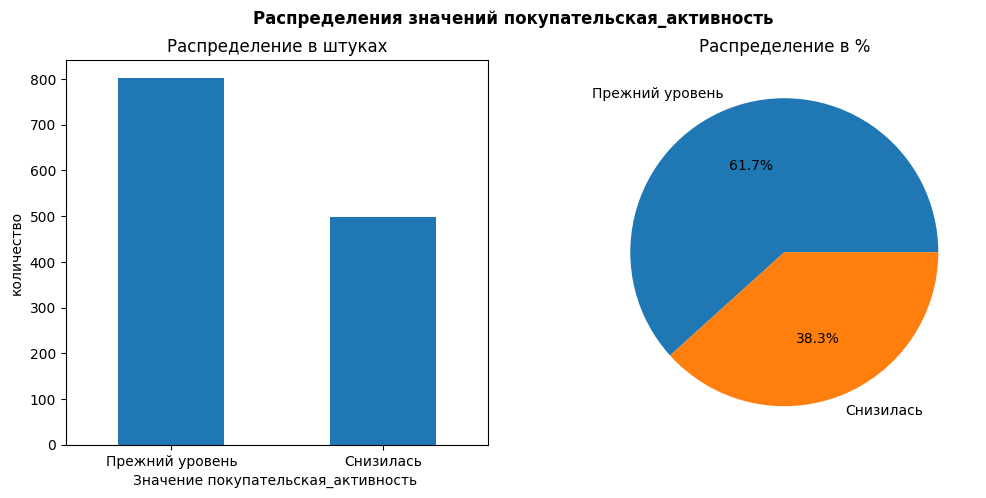


Описательная статистика:
count                1300
unique                  2
top       Прежний уровень
freq                  802
Name: покупательская_активность, dtype: object


In [24]:
plot_bar_pie(df_market['покупательская_активность'])

У 38% пользователей снижается покупательская активность

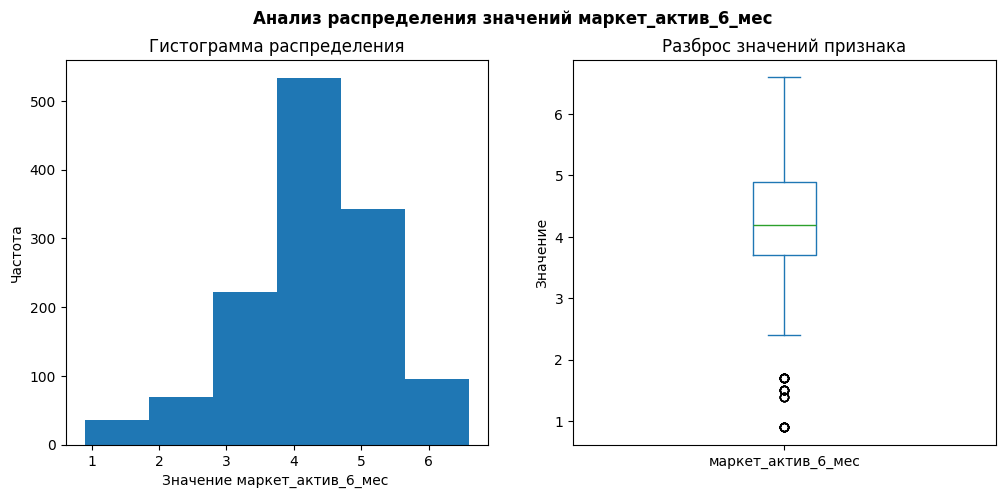


Описательная статистика:
count   1_300.0000
mean        4.2538
std         1.0148
min         0.9000
25%         3.7000
50%         4.2000
75%         4.9000
max         6.6000
Name: маркет_актив_6_мес, dtype: float64


In [25]:
plot_hist_box(df_market['маркет_актив_6_мес'], bins=6)

Распределение похоже на нормальное со смещением в право. Среднее значение количества ежемесячных коммуникаций около 4. Хотя "ящик с усами" показывает выбросы - это одна - две коммуникации в месяц выбросом читать не будем. 

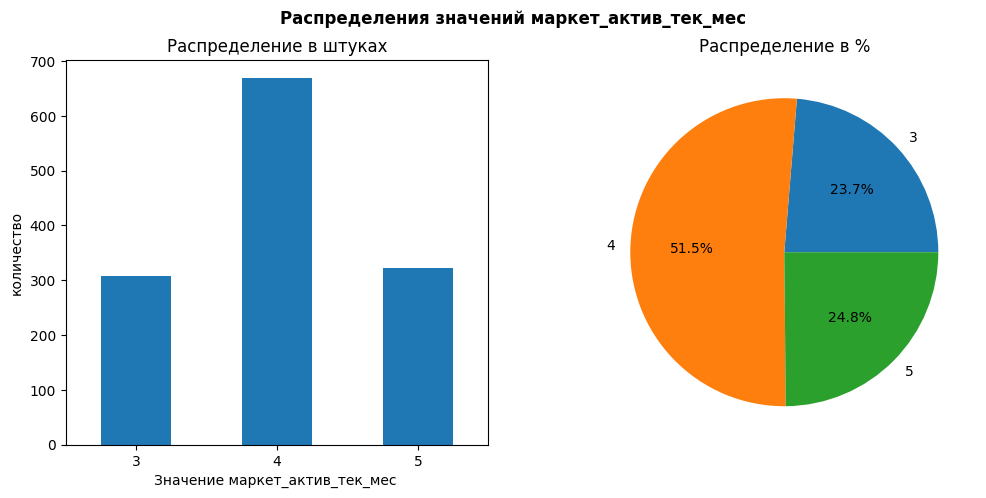


Описательная статистика:
count   1_300.0000
mean        4.0115
std         0.6969
min         3.0000
25%         4.0000
50%         4.0000
75%         4.0000
max         5.0000
Name: маркет_актив_тек_мес, dtype: float64


In [26]:
plot_bar_pie(df_market['маркет_актив_тек_мес'])

В текущем месяце среднее количество коммуникаций так же 4, но нет значений меньше 3х и больше 5.

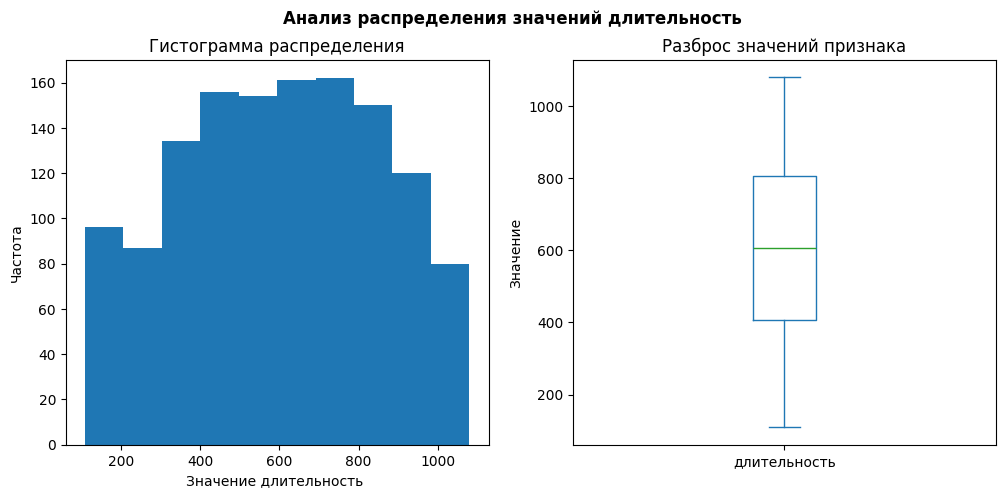


Описательная статистика:
count   1_300.0000
mean      601.8985
std       249.8563
min       110.0000
25%       405.5000
50%       606.0000
75%       806.0000
max     1_079.0000
Name: длительность, dtype: float64


In [27]:
plot_hist_box(df_market['длительность'], bins=10)

Минимальное колличество дней с момента регистрации 110. Новые пользователи не регистрируются или их нем в предоставленной выборке?

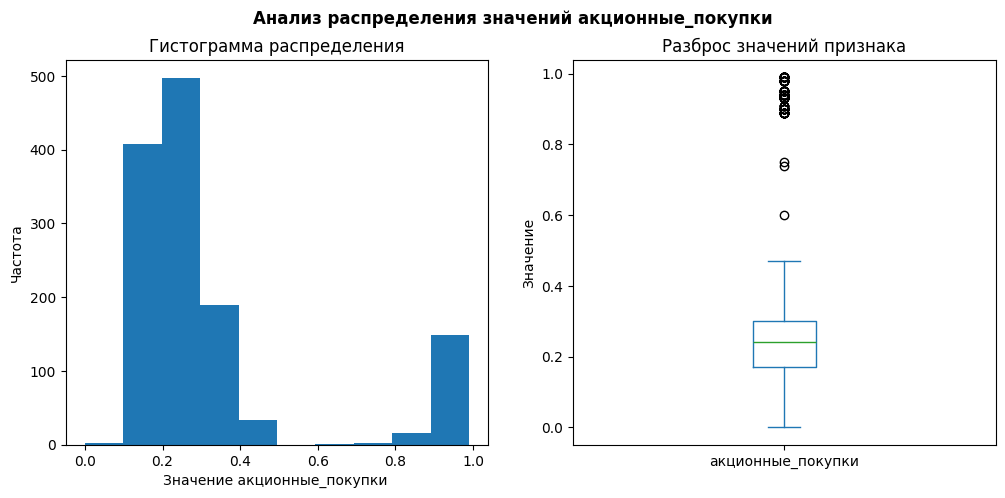


Описательная статистика:
count   1_300.0000
mean        0.3198
std         0.2498
min         0.0000
25%         0.1700
50%         0.2400
75%         0.3000
max         0.9900
Name: акционные_покупки, dtype: float64


In [28]:
plot_hist_box(df_market['акционные_покупки'], bins=10)

Здесь явно выделется 2 категории пользователей одна из них те, кто покупают только по акции

Сразуже категоризируем признак `акционные_покупки` добавим солбец `акционные_покупки_высокая_доля` границу разбиения PROMO_THRESHOLD установим 0.5

In [29]:
df_market['акционные_покупки_высокая_доля'] = (
    df_market['акционные_покупки'].apply(
        lambda x: 1 if x > PROMO_THRESHOLD else 0)
)

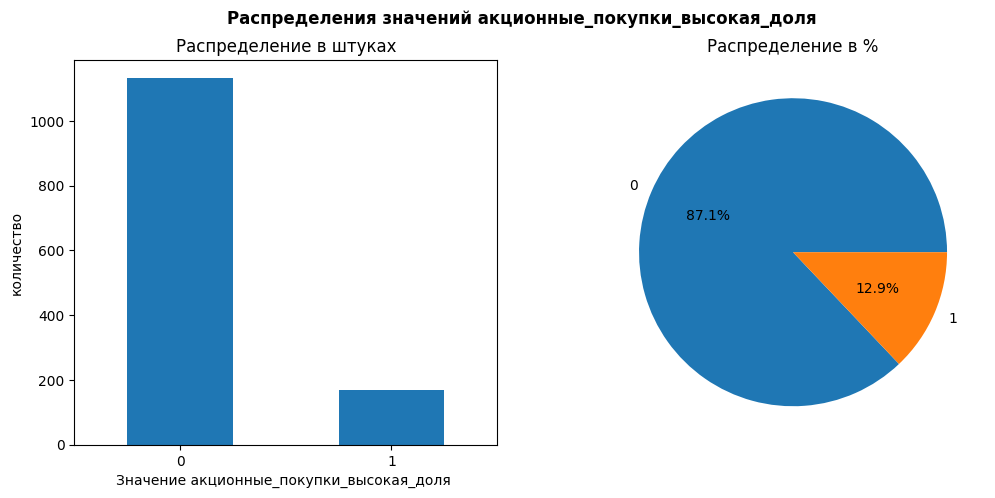


Описательная статистика:
count   1_300.0000
mean        0.1292
std         0.3356
min         0.0000
25%         0.0000
50%         0.0000
75%         0.0000
max         1.0000
Name: акционные_покупки_высокая_доля, dtype: float64


In [30]:
plot_bar_pie(df_market['акционные_покупки_высокая_доля'])

Всего около 13% - доля покупателей которые любят покупать по акции

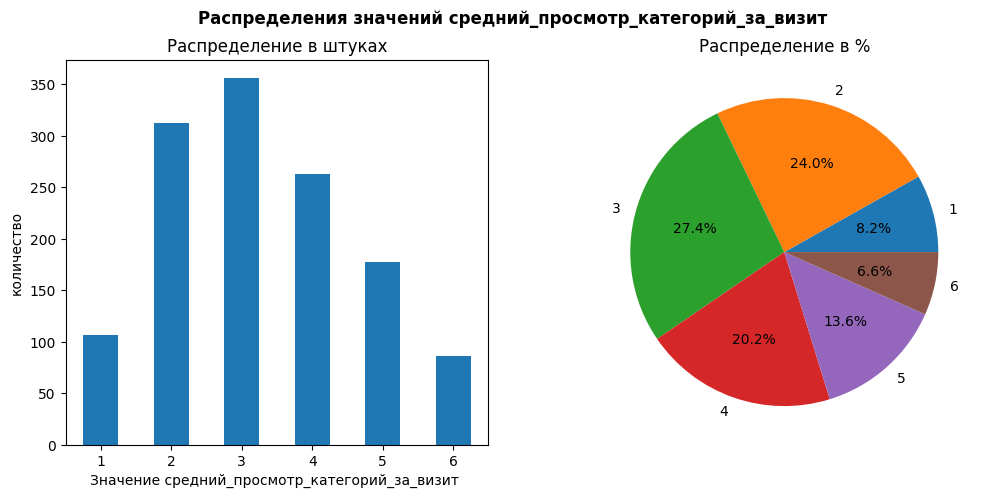


Описательная статистика:
count   1_300.0000
mean        3.2700
std         1.3554
min         1.0000
25%         2.0000
50%         3.0000
75%         4.0000
max         6.0000
Name: средний_просмотр_категорий_за_визит, dtype: float64


In [31]:
plot_bar_pie(df_market['средний_просмотр_категорий_за_визит'])

В среднем просматривают 3 категории товаров.

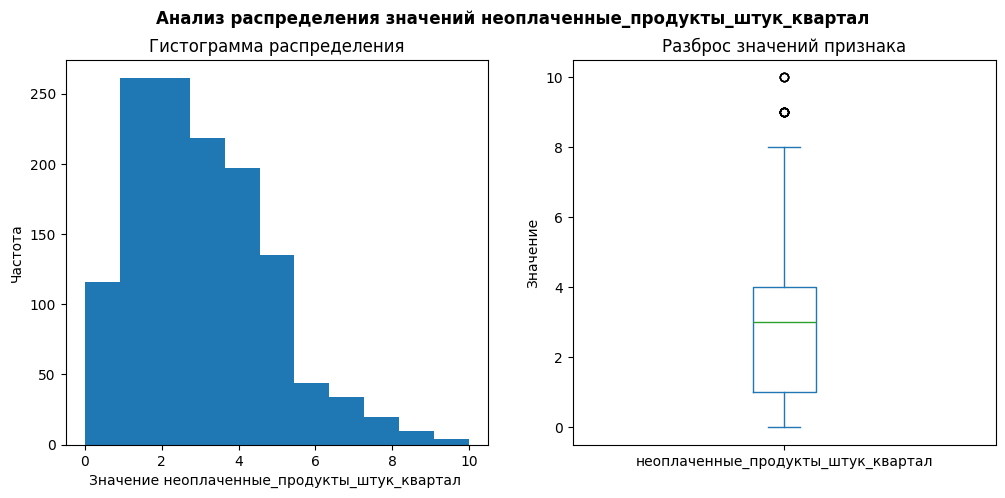


Описательная статистика:
count   1_300.0000
mean        2.8400
std         1.9715
min         0.0000
25%         1.0000
50%         3.0000
75%         4.0000
max        10.0000
Name: неоплаченные_продукты_штук_квартал, dtype: float64


In [32]:
plot_hist_box(df_market['неоплаченные_продукты_штук_квартал'], bins=11)

Нулевое значение в общем числе неоплаченных товаров в корзине за последние 3 месяца выглядит странно.

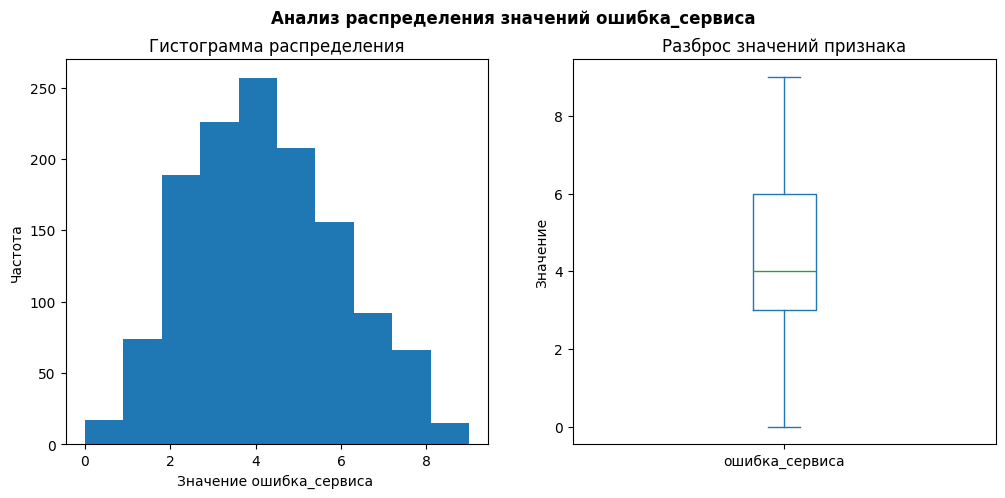


Описательная статистика:
count   1_300.0000
mean        4.1854
std         1.9553
min         0.0000
25%         3.0000
50%         4.0000
75%         6.0000
max         9.0000
Name: ошибка_сервиса, dtype: float64


In [33]:
plot_hist_box(df_market['ошибка_сервиса'], bins=10)

В среднем пользователи столкнулись с 4мя ошибками, не слишком ли много!?

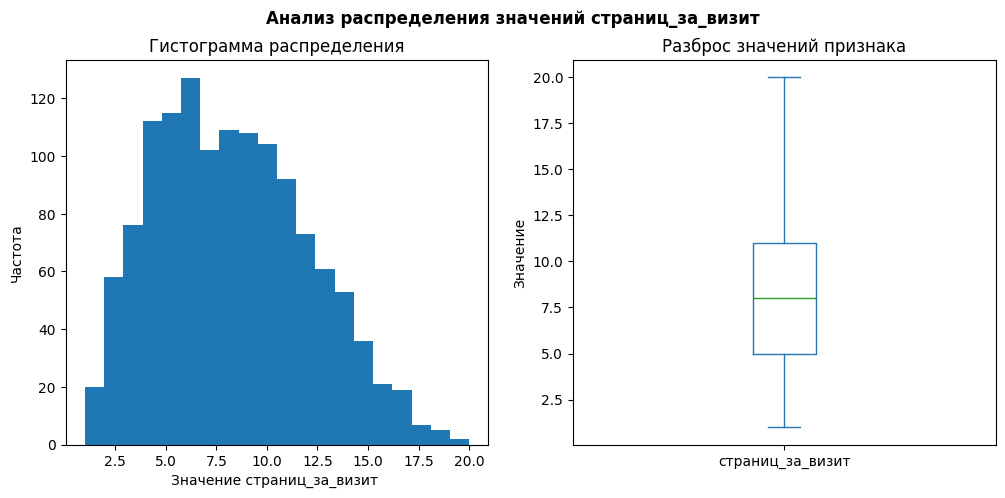


Описательная статистика:
count   1_300.0000
mean        8.1769
std         3.9781
min         1.0000
25%         5.0000
50%         8.0000
75%        11.0000
max        20.0000
Name: страниц_за_визит, dtype: float64


In [34]:
plot_hist_box(df_market['страниц_за_визит'], bins=20)

Распределение близко к нормальному

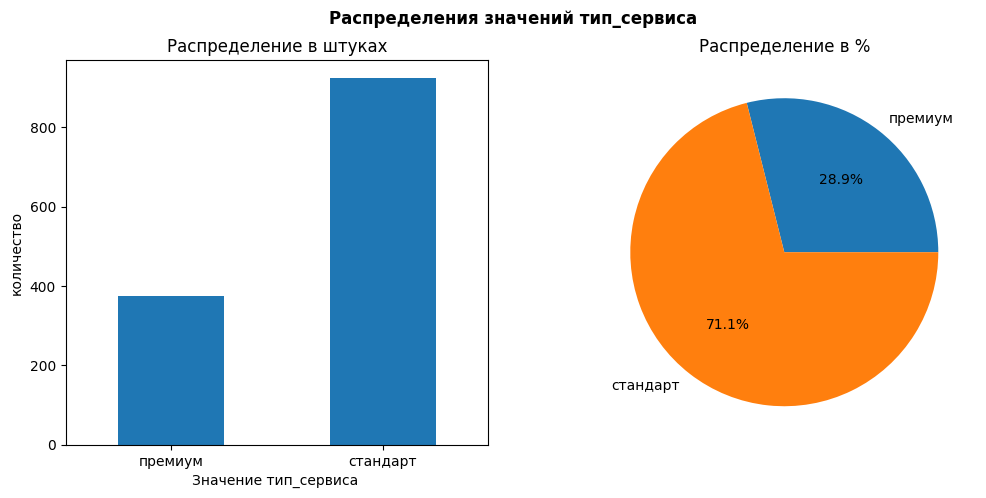


Описательная статистика:
count         1300
unique           2
top       стандарт
freq           924
Name: тип_сервиса, dtype: object


In [35]:
plot_bar_pie(df_market['тип_сервиса'])

Около трети примеальных клиентов

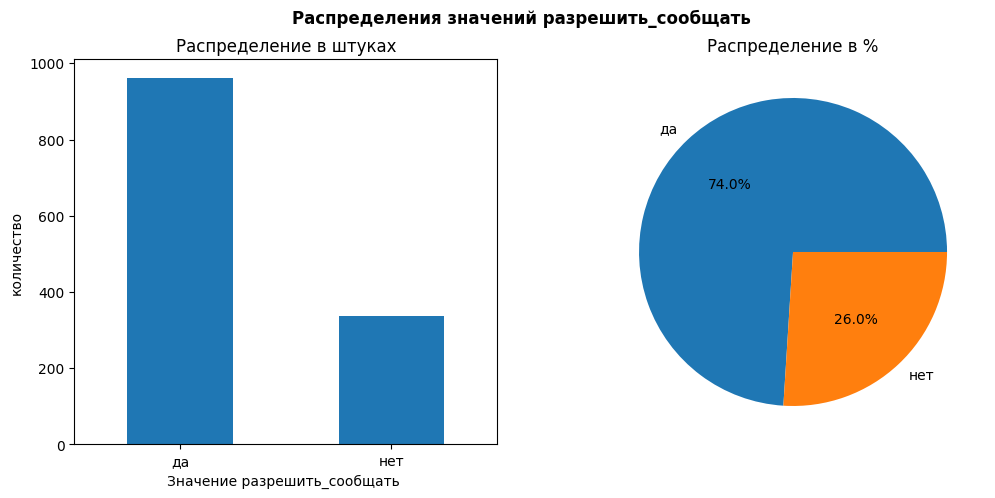


Описательная статистика:
count     1300
unique       2
top         да
freq       962
Name: разрешить_сообщать, dtype: object


In [36]:
plot_bar_pie(df_market['разрешить_сообщать'])

26% не разрешили уведомления

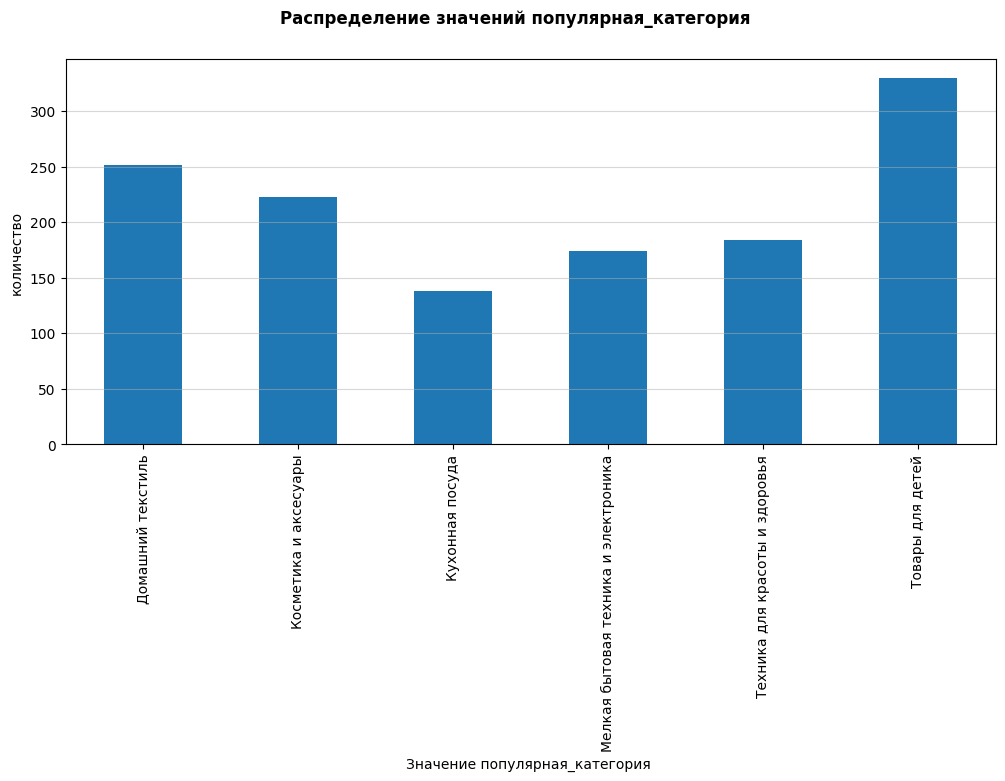


Описательная статистика:
count                 1300
unique                   6
top       Товары для детей
freq                   330
Name: популярная_категория, dtype: object


In [37]:
plot_bar(df_market['популярная_категория'], rot=90)

Товары для детей опережают другие категории

### Анализ `df_market_money`
Проанализируем значения столбa `выручка` датафрейма `df_market_money`. Построим гистограмму по периодам.

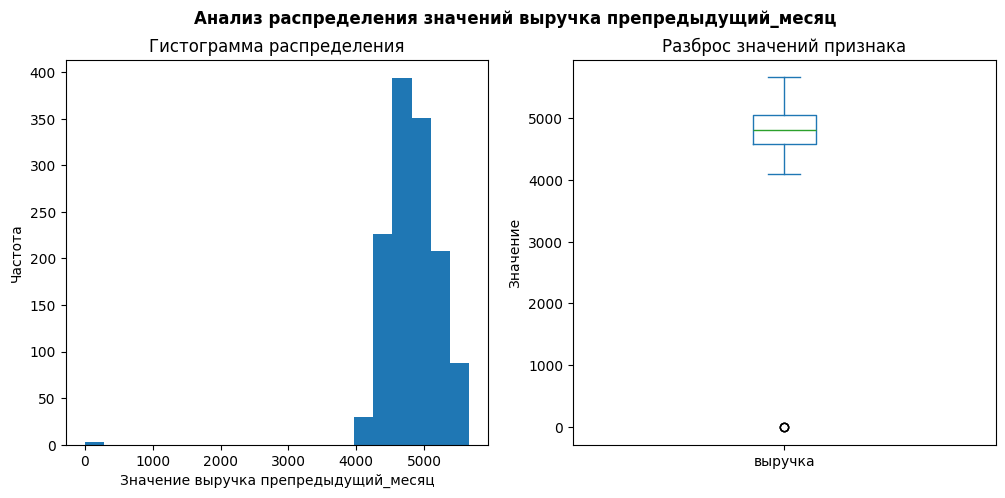


Описательная статистика:
count   1_300.0000
mean    4_825.2069
std       405.9797
min         0.0000
25%     4_583.0000
50%     4_809.0000
75%     5_053.5000
max     5_663.0000
Name: выручка, dtype: float64


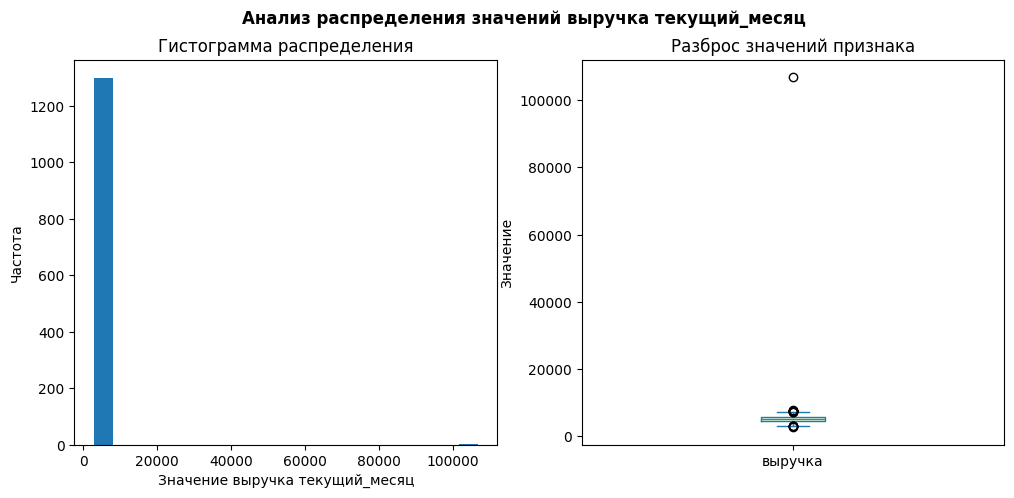


Описательная статистика:
count     1_300.0000
mean      5_314.9608
std       2_939.7082
min       2_758.7000
25%       4_706.0500
50%       5_179.9500
75%       5_761.7250
max     106_862.2000
Name: выручка, dtype: float64


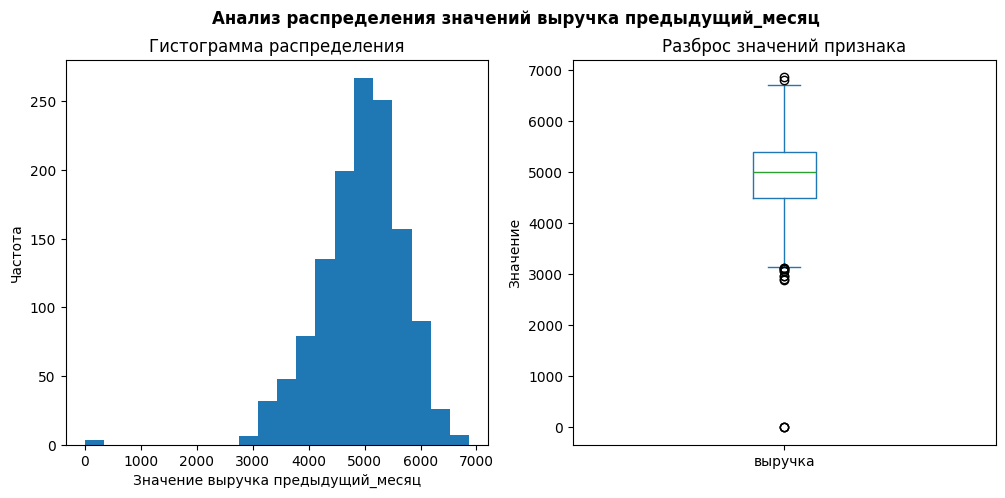


Описательная статистика:
count   1_300.0000
mean    4_936.9204
std       739.5980
min         0.0000
25%     4_496.7500
50%     5_005.0000
75%     5_405.6250
max     6_869.5000
Name: выручка, dtype: float64


In [38]:
periods = df_market_money['период'].unique()
for period in periods:
    plot_hist_box(
        df_market_money.loc[df_market_money['период'] == period]['выручка'],
        bins=20,
        name=period
    )

В выручке есть выбросы. Нулевое значение и заказ на 106 тысячь. Они могут повлиять на качество моделей. 
Сохраним датафрейм без артефактов в отдельную переменную и построим гистограммы на очищенных данных.

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'>Действительно явный выброс.
Можно удалить, а можно и заполнить, например значением предыдущего месяца.</font>

In [39]:
df_market_money.query('выручка == 0 or выручка > 10000')

,id,период,выручка
0,215348,препредыдущий_месяц,0.0000
2,215348,предыдущий_месяц,0.0000
28,215357,препредыдущий_месяц,0.0000
29,215357,предыдущий_месяц,0.0000
34,215359,предыдущий_месяц,0.0000
35,215359,препредыдущий_месяц,0.0000
98,215380,текущий_месяц,106_862.2000


In [40]:
df_market_money_clean = df_market_money.query('0 < выручка < 100000')

<font color='blue'><b>Комментарий ревьюера : </b></font> ✔️\
<font color='green'>Неактивные удалены 👌</font>

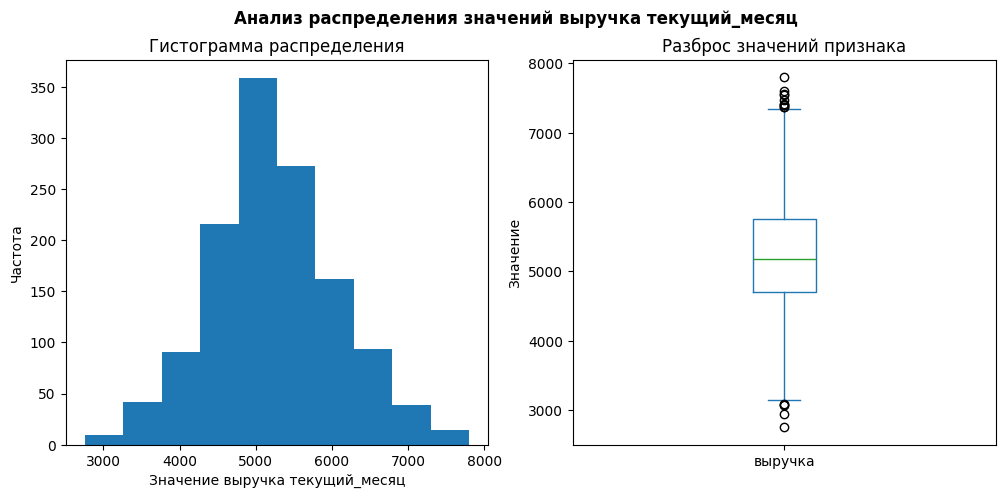


Описательная статистика:
count   1_299.0000
mean    5_236.7875
std       835.4747
min     2_758.7000
25%     4_705.5000
50%     5_179.6000
75%     5_759.9500
max     7_799.4000
Name: выручка, dtype: float64


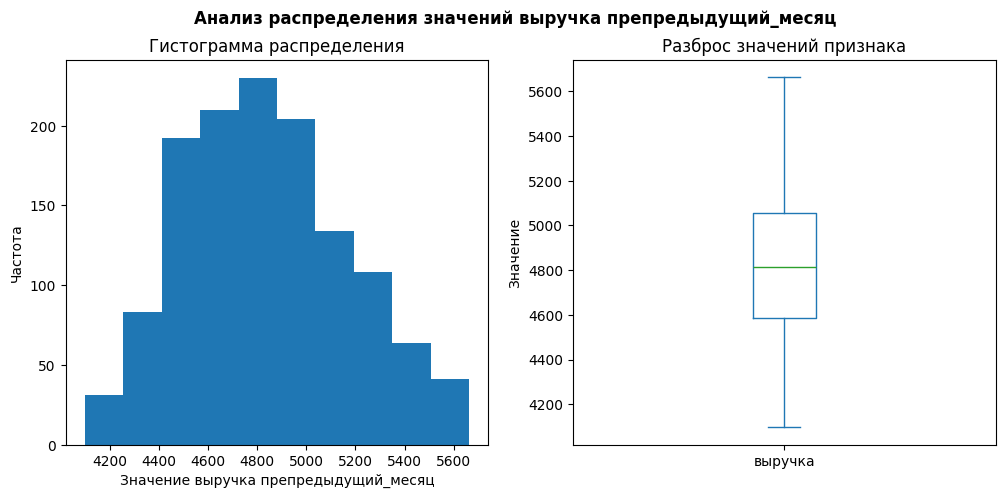


Описательная статистика:
count   1_297.0000
mean    4_836.3678
std       333.4387
min     4_098.0000
25%     4_585.0000
50%     4_812.0000
75%     5_055.0000
max     5_663.0000
Name: выручка, dtype: float64


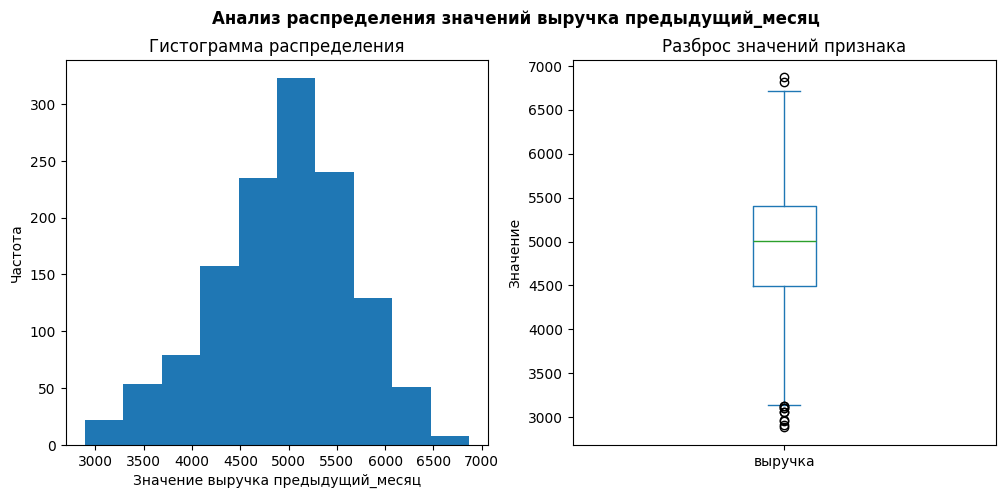


Описательная статистика:
count   1_297.0000
mean    4_948.3396
std       701.2286
min     2_890.0000
25%     4_498.5000
50%     5_005.5000
75%     5_409.0000
max     6_869.5000
Name: выручка, dtype: float64


In [41]:
periods = df_market_money_clean['период'].unique()
for period in periods:
    plot_hist_box(
        df_market_money_clean.loc[df_market_money_clean[
            'период'] == period]['выручка'],
        bins=10,
        name=period
    )

### Анализ `df_market_time`
Проанализируем значения столбa `минут` датафрейма `df_market_time`. Построим гистограмму по периодам.

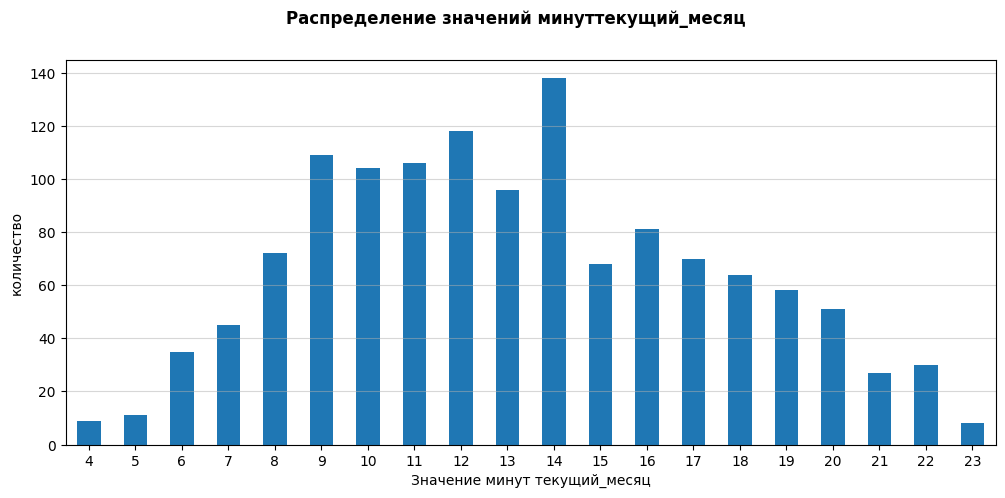


Описательная статистика:
count   1_300.0000
mean       13.2046
std         4.2206
min         4.0000
25%        10.0000
50%        13.0000
75%        16.0000
max        23.0000
Name: минут, dtype: float64


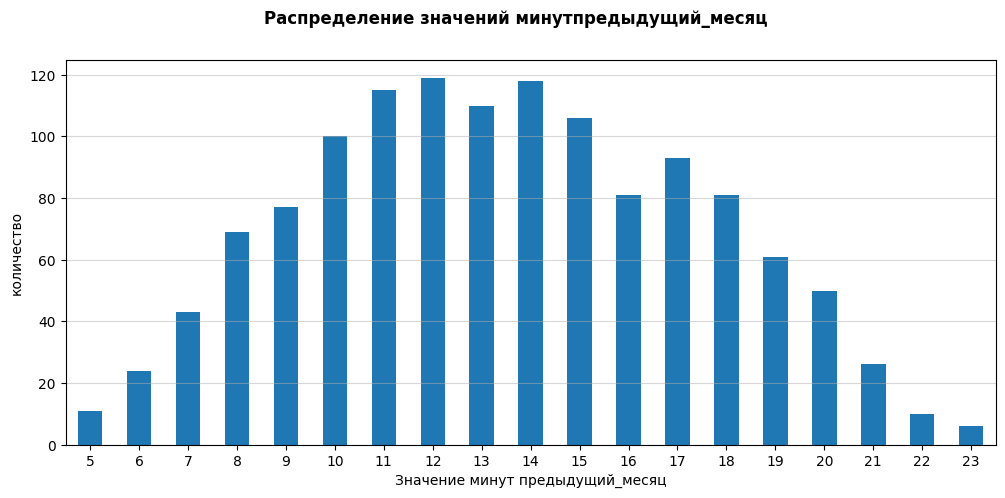


Описательная статистика:
count   1_300.0000
mean       13.4677
std         3.9320
min         5.0000
25%        11.0000
50%        13.0000
75%        17.0000
max        23.0000
Name: минут, dtype: float64


In [42]:
periods = df_market_time['период'].unique()
for period in periods:
    plot_bar(
        df_market_time.loc[df_market_time['период'] == period]['минут'],
        name=period
    )

Распределение похоже на нормальное, среднее время в районе 13 минут.

### Анализ `df_money`
Проанализируем значения столбa `прибыль` датафрейма `df_money`. Построим гистограмму

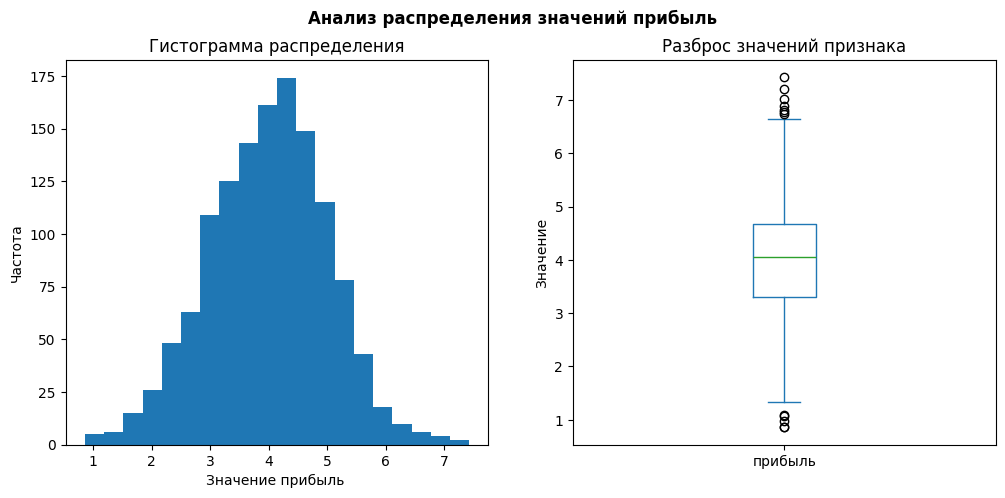


Описательная статистика:
count   1_300.0000
mean        3.9966
std         1.0137
min         0.8600
25%         3.3000
50%         4.0450
75%         4.6700
max         7.4300
Name: прибыль, dtype: float64


In [43]:
plot_hist_box(df_money['прибыль'], bins=20)

Распределение похоже на нормальное. Выбросы отсутствуют.

Нужно отобрать клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период. Сделаем это перед объединенеим таблиц.

Провели анализ датафреймов. Можем переходить к следующему этапу.

## Объединение таблиц
* Объединм таблицы `market_file.csv`, `market_money.csv`, `market_time.csv`, `money.csv`. 
* Надо учесть, что данные о выручке и времени на сайте находятся в одном столбце для всех периодов. В итоговой таблице сделаем отдельный столбец для каждого периода.

Прежде чем объеденять таблицы преобразуем df_market_mone и df_market_time таким образом, чтобы значения столбца период стали столбцами. Будем использовать очищенные данные `df_market_money_clean`

In [44]:
df_market_money_transformed = df_market_money.pivot_table(
    index='id', 
    values='выручка',
    aggfunc='sum',
    columns='период'
)
df_market_money_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1300 entries, 215348 to 216647
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   предыдущий_месяц     1300 non-null   float64
 1   препредыдущий_месяц  1300 non-null   float64
 2   текущий_месяц        1300 non-null   float64
dtypes: float64(3)
memory usage: 40.6 KB


In [45]:
# проверка на дубликаты в индексах
df_market_money_transformed.index.duplicated().sum()

0

Аналогичную трансформацию проведем с `df_market_time`

In [46]:
df_market_time_transformed = df_market_time.pivot_table(
    index='id', 
    values='минут',
    aggfunc='sum',
    columns='период'
)
df_market_time_transformed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1300 entries, 215348 to 216647
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   предыдущий_месяц  1300 non-null   int64
 1   текущий_месяц     1300 non-null   int64
dtypes: int64(2)
memory usage: 30.5 KB


In [47]:
# проверка на дубликаты в индексах
df_market_time_transformed.index.duplicated().sum()

0

`id` в `df_market` и `df_money` сделаем индексами

In [48]:
df_market = df_market.set_index('id')
df_money = df_money.set_index('id')

Преобразуем значения 

Перед объединением проверим размерности датафреймов

In [49]:
print(f'Размерность датафрейма df_market: {df_market.shape}')
print(f'Размерность датафрейма df_market_money_transformed: '
      f'{df_market_money_transformed.shape}')
print(f'Размерность датафрейма df_market_time_transformed: '
      f'{df_market_time_transformed.shape}')
print(f'Размерность датафрейма df_money: {df_money.shape}')

Размерность датафрейма df_market: (1300, 13)
Размерность датафрейма df_market_money_transformed: (1300, 3)
Размерность датафрейма df_market_time_transformed: (1300, 2)
Размерность датафрейма df_money: (1300, 1)


Отберем клиентов с покупательской активностью не менее трёх месяцев, это клиенты из датафрейма `df_market_time_transformed`. Сравним с ним другие датафреймы.

In [50]:
# Проверяем, сколько индексов из df_market_money есть в df_market
df_market_money_transformed.index.isin(df_market.index).sum()

1300

In [51]:
# Проверяем, сколько индексов из df_market_money есть 
# в df_market_time_transformed
df_market_money_transformed.index.isin(df_market_time_transformed.index).sum()

1300

In [52]:
# Проверяем, сколько индексов из df_market_money есть
# в df_market_time_transformed
df_market_money_transformed.index.isin(df_money.index).sum()

1300

Все имеющиеся данные - по клиентам которые что-либо покупали за последние 3 месяца.

In [53]:
df_market_merged = df_market.merge(
    df_market_money_transformed,
    left_index=True,
    right_index=True, 
    how='inner'
)

Проверим размерность получившегося датафрейма

In [54]:
df_market_merged.shape

(1300, 16)

Объеденим с `df_market_merged` c `df_market_time_transformed`

In [55]:
df_market_merged = df_market_merged.merge(
    df_market_time_transformed,
    left_index=True,
    right_index=True,
    suffixes=('_выручка', '_минут'),
    how='inner'
)

Проверим размерность получившегося датафрейма

In [56]:
df_market_merged.shape

(1300, 18)

Объеденим с `df_market_merged` c `df_money`

In [57]:
df_market_merged = df_market_merged.merge(
    df_money,
    left_index=True,
    right_index=True,
    how='inner'
)

Проверим строки в которых были выбросы после чего примем решение о их судьбе

In [58]:
df_market_merged.query('текущий_месяц_выручка > 100000 or \
    предыдущий_месяц_выручка == 0 or препредыдущий_месяц == 0')

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,акционные_покупки_высокая_доля,предыдущий_месяц_выручка,препредыдущий_месяц,текущий_месяц_выручка,предыдущий_месяц_минут,текущий_месяц_минут,прибыль
id,,,,,,,,,,,,,,,,,,,
215348,Снизилась,премиум,да,3.4000,5,121,0.0000,Товары для детей,6,2,1,5,0,0.0000,0.0000,3_293.1000,13,14,0.9800
215357,Снизилась,стандарт,да,3.9000,5,154,0.0000,Техника для красоты и здоровья,3,3,9,5,0,0.0000,0.0000,5_986.3000,12,6,4.6600
215359,Снизилась,стандарт,да,4.6000,5,110,0.0000,Домашний текстиль,4,2,4,2,0,0.0000,0.0000,4_735.0000,13,11,5.0800
215380,Снизилась,премиум,нет,1.7000,4,637,0.9400,Техника для красоты и здоровья,3,2,4,7,1,6_077.0000,5_051.0000,106_862.2000,12,14,3.8800


In [59]:
df_market_merged = df_market_merged.query('текущий_месяц_выручка != 0 and \
    предыдущий_месяц_выручка != 0 and препредыдущий_месяц != 0')

In [60]:
#Выбросу в выручке соответствует обычное значение в прибыли значит это 
# аномалиая - удалим эту строку 
df_market_merged = df_market_merged.query('текущий_месяц_выручка < 100000')

Удалим столбец "акционные_покупки" вмесно него у нас есть "акционные_покупки_высокая_доля"

In [61]:
df_market_merged = df_market_merged.drop('акционные_покупки', axis=1)

Проверим информацию об объединенном датафрейме

In [62]:
df_market_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1296 entries, 215349 to 216647
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   покупательская_активность            1296 non-null   object 
 1   тип_сервиса                          1296 non-null   object 
 2   разрешить_сообщать                   1296 non-null   object 
 3   маркет_актив_6_мес                   1296 non-null   float64
 4   маркет_актив_тек_мес                 1296 non-null   int64  
 5   длительность                         1296 non-null   int64  
 6   популярная_категория                 1296 non-null   object 
 7   средний_просмотр_категорий_за_визит  1296 non-null   int64  
 8   неоплаченные_продукты_штук_квартал   1296 non-null   int64  
 9   ошибка_сервиса                       1296 non-null   int64  
 10  страниц_за_визит                     1296 non-null   int64  
 11  акционные_покупки_высокая_до

Таблицы объеденены. Переходим к следующему шагу.

## Корреляционный анализ
Проведем корреляционный анализ признаков в количественной шкале в итоговой таблице для моделирования.

Построим маприцу корреляций количественных признаков методоми Кендада и Пирсона для выявления возможных не линейных зависимостей.

In [63]:
def corr_matrix_methods(df, methods=['kendall', 'pearson']):
    num_col_names = df.select_dtypes(include='number').columns.tolist()

    for method in methods:
        print(f'Матрица коррелящий, метод {method}')
        df_corr = df[num_col_names].corr(method=method) 
        display(df_corr)
        sns.heatmap(df_corr, annot=True, fmt='.2f')
        plt.title(f'Тепловая карта корреляций, метод {method}')
        plt.show()
        print()

Матрица коррелящий, метод kendall


,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,акционные_покупки_высокая_доля,предыдущий_месяц_выручка,препредыдущий_месяц,текущий_месяц_выручка,предыдущий_месяц_минут,текущий_месяц_минут,прибыль
маркет_актив_6_мес,1.0000,0.0492,-0.0303,0.1379,-0.0964,0.0279,0.2259,-0.1340,-0.0015,0.1600,0.0022,0.1914,0.1606,-0.0084
маркет_актив_тек_мес,0.0492,1.0000,-0.1031,-0.0221,0.0509,0.0718,0.0027,-0.0174,-0.0209,-0.0306,-0.0092,0.0111,-0.0504,-0.0208
длительность,-0.0303,-0.1031,1.0000,-0.0284,-0.0769,0.0743,-0.0235,-0.0013,0.0085,-0.0256,0.0101,-0.0851,0.0568,0.0191
средний_просмотр_категорий_за_визит,0.1379,-0.0221,-0.0284,1.0000,-0.1973,0.0076,0.2039,-0.1187,-0.0369,0.1092,-0.0522,0.1098,0.1749,-0.0286
неоплаченные_продукты_штук_квартал,-0.0964,0.0509,-0.0769,-0.1973,1.0000,-0.0749,-0.1177,0.1019,0.0246,-0.1786,0.0439,-0.1338,-0.1593,-0.0030
ошибка_сервиса,0.0279,0.0718,0.0743,0.0076,-0.0749,1.0000,0.0767,-0.0109,0.0250,0.0643,0.0284,0.1453,0.0575,0.0216
страниц_за_визит,0.2259,0.0027,-0.0235,0.2039,-0.1177,0.0767,1.0000,-0.2094,-0.0473,0.2143,-0.0340,0.3254,0.2098,-0.0150
акционные_покупки_высокая_доля,-0.1340,-0.0174,-0.0013,-0.1187,0.1019,-0.0109,-0.2094,1.0000,0.0008,-0.1181,0.0100,-0.1756,-0.1457,-0.0389
предыдущий_месяц_выручка,-0.0015,-0.0209,0.0085,-0.0369,0.0246,0.0250,-0.0473,0.0008,1.0000,0.2074,0.6911,-0.0574,-0.0566,-0.0208
препредыдущий_месяц,0.1600,-0.0306,-0.0256,0.1092,-0.1786,0.0643,0.2143,-0.1181,0.2074,1.0000,0.1127,0.2435,0.2065,0.0040


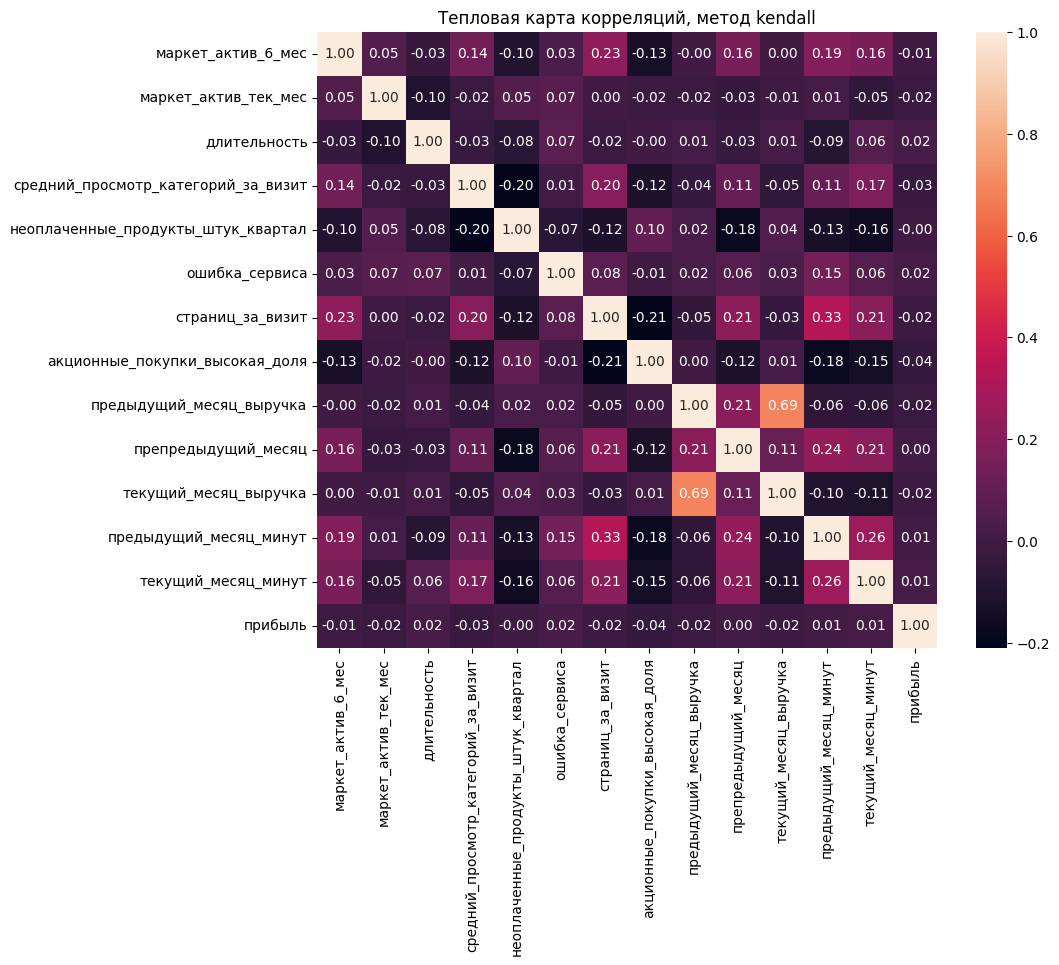


Матрица коррелящий, метод pearson


,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,акционные_покупки_высокая_доля,предыдущий_месяц_выручка,препредыдущий_месяц,текущий_месяц_выручка,предыдущий_месяц_минут,текущий_месяц_минут,прибыль
маркет_актив_6_мес,1.0000,0.0587,-0.0390,0.2032,-0.1653,0.0343,0.3151,-0.1799,0.0196,0.2437,0.0131,0.2882,0.2228,-0.0001
маркет_актив_тек_мес,0.0587,1.0000,-0.1340,-0.0239,0.0550,0.0880,0.0052,-0.0184,-0.0339,-0.0426,-0.0167,0.0111,-0.0666,-0.0218
длительность,-0.0390,-0.1340,1.0000,-0.0546,-0.0926,0.1123,-0.0395,-0.0003,0.0100,-0.0503,0.0160,-0.1221,0.0925,0.0285
средний_просмотр_категорий_за_визит,0.2032,-0.0239,-0.0546,1.0000,-0.2745,0.0070,0.2400,-0.1287,-0.0395,0.1409,-0.0741,0.1354,0.2257,-0.0407
неоплаченные_продукты_штук_квартал,-0.1653,0.0550,-0.0926,-0.2745,1.0000,-0.0922,-0.1947,0.1522,-0.0054,-0.2627,0.0382,-0.1828,-0.2069,-0.0010
ошибка_сервиса,0.0343,0.0880,0.1123,0.0070,-0.0922,1.0000,0.0876,-0.0104,0.0399,0.0762,0.0317,0.1872,0.0744,0.0237
страниц_за_визит,0.3151,0.0052,-0.0395,0.2400,-0.1947,0.0876,1.0000,-0.2382,-0.0398,0.2929,-0.0293,0.4253,0.2545,-0.0222
акционные_покупки_высокая_доля,-0.1799,-0.0184,-0.0003,-0.1287,0.1522,-0.0104,-0.2382,1.0000,-0.0075,-0.1451,0.0050,-0.2028,-0.1638,-0.0492
предыдущий_месяц_выручка,0.0196,-0.0339,0.0100,-0.0395,-0.0054,0.0399,-0.0398,-0.0075,1.0000,0.3278,0.8391,-0.0647,-0.0525,-0.0219
препредыдущий_месяц,0.2437,-0.0426,-0.0503,0.1409,-0.2627,0.0762,0.2929,-0.1451,0.3278,1.0000,0.1217,0.3475,0.2996,0.0088


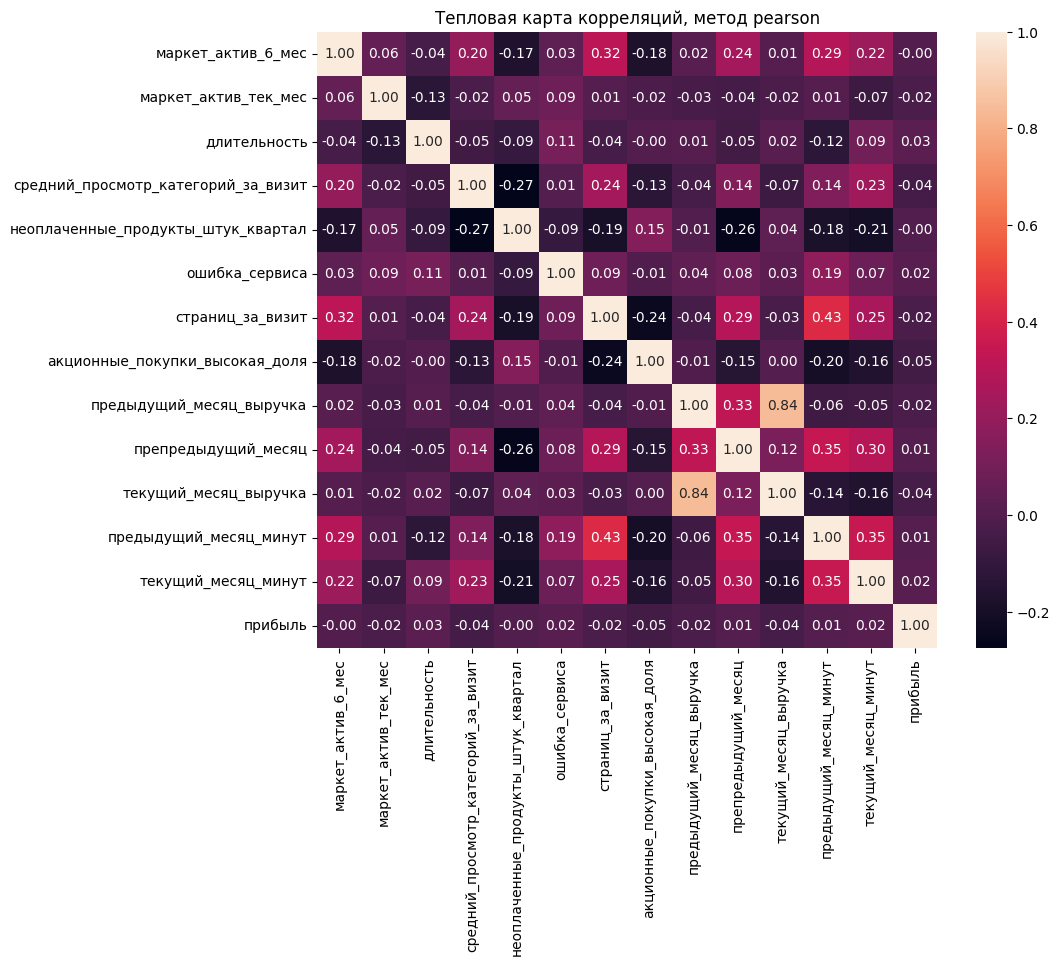

In [64]:
corr_matrix_methods(df_market_merged)

Высоких корреляций (0.9 +) не видно, скорее всего мультиколлинеарности нет. Подозрения на нелинейнось зависимостей не выявлено

Для более полной картины построим матрицу корредяций по всем(колличественным и категориальным) признакам для этого будем использовать `phik_matrix` из библиотеки `phik`

In [65]:
num_col_names = df_market_merged.select_dtypes(include='number').columns.tolist()
phik_overview = phik_matrix(df_market_merged, interval_cols=num_col_names) 

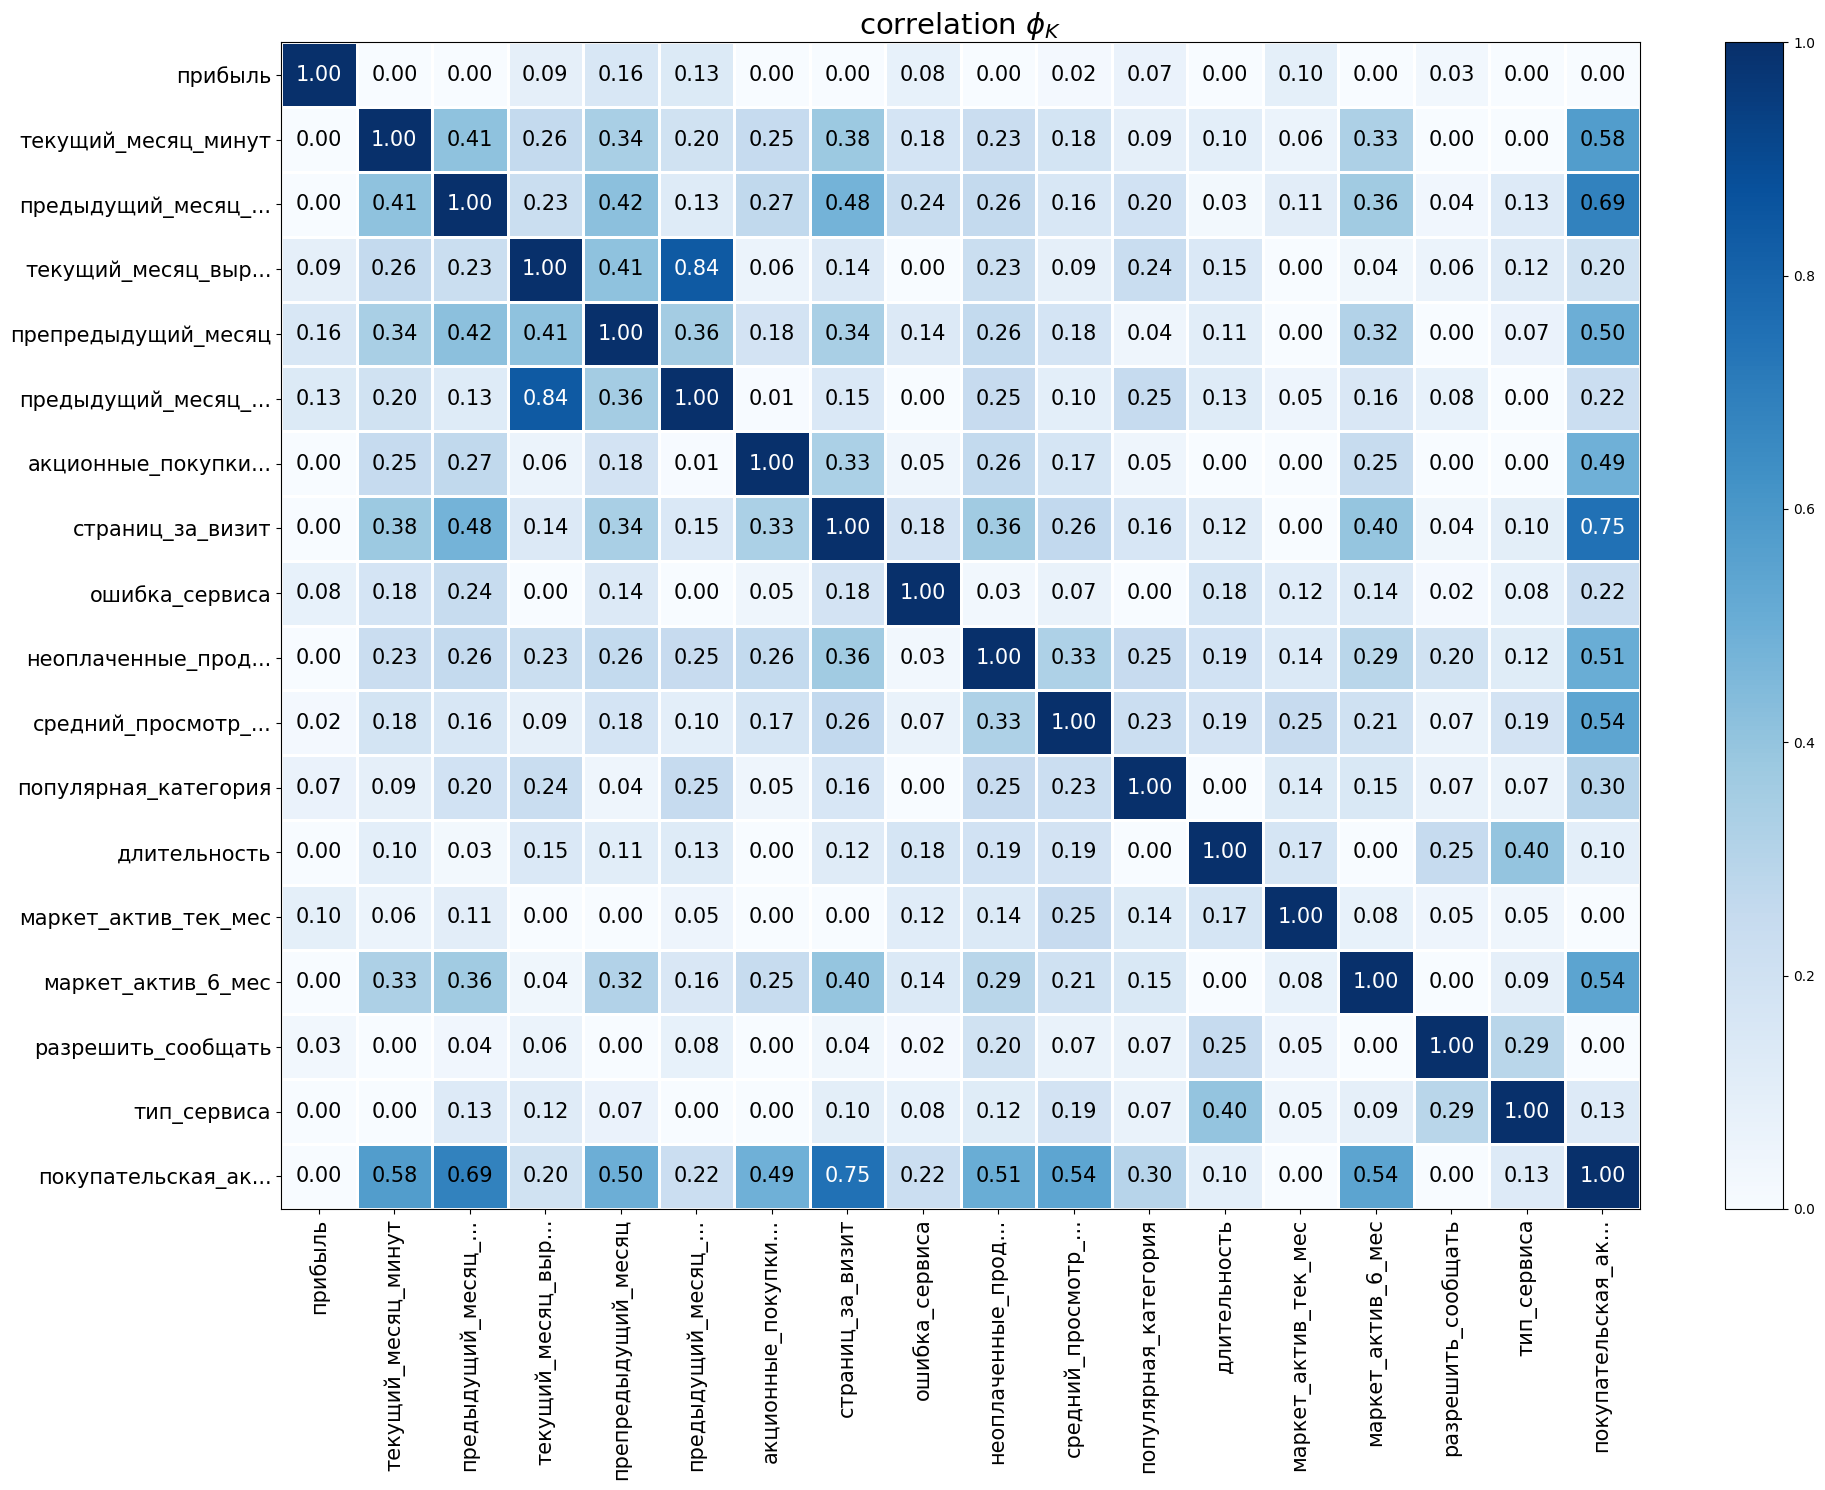

In [66]:
plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Blues',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
) 

`phik_matrix` зависимости между `предыдущий_месяц_выручка` и `текущий_месяц_выручка` не обнаруживает.
Наибольшие значения корреляци видим между следующими параметрами:

* `акционные_покупки` - `препредыдущий_месяц`
* `покупательская_активность` - `страниц_за_визит`
* `акционные_покупки` - `предыдущий_месяц_выручка`
* `предыдущий_месяц_выручка` - `препредыдущий_месяц`

Мультиколлинеарность признаков не обнаружили. 

## Использование пайплайнов

### Подготовка данных
Во время подготовки данных будем использовать `ColumnTransformer`. Количественные и категориальные признаки обработаем в пайплайне раздельно. Для кодирования категориальных признаков используйте два кодировщика, для масштабирования количественных —два скейлера. Отдельно закодируем целевую переменную.

Для моделирования данные о прибыли удалим из датасета т.к. расчет прибыли происходит после совершения покупок.

In [67]:
df = df_market_merged.drop('прибыль', axis=1)

In [68]:
def split_data(df, 
               target_attr,
               random_state=RANDOM_STATE,
               test_size=TEST_SIZE):
    '''
    Принемает датафрейм, целевой признак, random_state, test_size
    возвращает разделенный на тренеровочную и тестовую выборки датафреймы.
    '''
    # делим данные на входные и целевые
    X = df.drop([target_attr], axis=1)
    y = df[target_attr]

    # делим данные на тренировочные и тестовые
    X_train, X_test, y_train, y_test = train_test_split(
        X,
        y,
        test_size=test_size,
        random_state=random_state,
        stratify=y)
    return X_train, X_test, y_train, y_test

Разбивает подготовленный датафрейм на тренеровочную и тестовую выборки

In [69]:
X_train, X_test, y_train, y_test = split_data(df, 'покупательская_активность')

In [70]:
# кодируем целевую переменную LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

In [71]:
def make_pipeline(X_train, X_test, y_train, y_test,
                  ohe_columns=None,
                  ord_columns=None
                 ):

    transformers = []
    # создаём списки с названиями признаков
    num_columns = X_train.select_dtypes(include='number').columns.tolist()
    transformers.append(('num', MinMaxScaler(), num_columns))
    # создаём пайплайн для подготовки признаков из списка ohe_columns: 
    #заполнение пропусков и OHE-кодирование
    # SimpleImputer + OHE
    if ohe_columns:
        ohe_pipe = Pipeline(
            [('simple_imputer_ohe', SimpleImputer(missing_values=np.nan,
                                                  strategy='most_frequent')),
             ('ohe', OneHotEncoder(drop='first',
                                   handle_unknown='ignore',
                                   sparse_output=False))
            ]
            )
        transformers.append(('ohe', ohe_pipe, ohe_columns))
    # создаём пайплайн для подготовки признаков из списка ord_columns: 
    # заполнение пропусков и Ordinal-кодирование
    # SimpleImputer + OE
    if ord_columns:
        ord_pipe = Pipeline(
            [('simple_imputer_before_ord', SimpleImputer(
                missing_values=np.nan, strategy='most_frequent')
             ),
             ('ord',  OrdinalEncoder(
                        categories=[
                            ['стандарт', 'премиум'],
                        ], 
                        handle_unknown='use_encoded_value',
                        unknown_value=np.nan
                    )
             ),
             ('simple_imputer_after_ord', SimpleImputer(
                 missing_values=np.nan,
                 strategy='most_frequent')
             )
            ]
        )
        transformers.append(('ord', ord_pipe, ord_columns))
        
    # создаём объедененный пайплайн для подготовки данных ColumnTransformer
    data_preprocessor = ColumnTransformer(
        transformers, 
        remainder='passthrough'
    )
    # создаём базовый пайплайн: подготовка данных и модель
    pipeline = Pipeline([
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ])
    return pipeline

### Обучение моделей, выбор лучшей модели
Обучим четыре модели: `KNeighborsClassifier()`, `DecisionTreeClassifier()`, `LogisticRegression()` и  `SVC()`. Для каждой из них подберем гиперпараметры. Используя метрику ROC_AUC выберем бучщую модель. Для этого будем использовать один общий пайплайн для всех моделей

In [72]:
# создаём базовый пайплайн: подготовка данных и модель
pipeline = make_pipeline(
    X_train, X_test, y_train, y_test,
    ohe_columns=['разрешить_сообщать',
                 'популярная_категория'],
    ord_columns =['тип_сервиса']
)

Создаем список словарей с параметрами моделей для param_distributions которые будут перебираться в RandomizedSearchCV.
Для переопределения свойств базового пайплайна исопльзуем побращение через '__'.

In [73]:
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 10),
        'models__max_features': range(2, 15),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'] 
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(10, 30),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
        #    solver='liblinear', 
        #    penalty='l1'
        )],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    # словарь для модели SVC()
    {
        'models': [SVC(random_state=RANDOM_STATE, probability=True)],
        'models__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'models__degree': range(3, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]

Инициализируем RandomizedSearchCV с подготовленными ранее параметрами и запускаем обучение. Выводим параметры лучшей модели и ее метрику ROC_AUC

Так как нам нужно оценить качество модели вне зависимости от порога вероятности, т.е. и FP и FN ошибки одинаково важны и имеется дизбаланс классов будеи использовать метрику ROC_AUC

In [74]:
randomized_search = RandomizedSearchCV(
    pipeline, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1,
    n_iter=50
)
randomized_search.fit(X_train, y_train_encoded)

print(f'Лучшая модель и её параметры: \n {randomized_search.best_params_} \n')
print(f'Метрика ROC_AUC лучшей модели на тренировочной выборке:'
      f'{randomized_search.best_score_}')

Лучшая модель и её параметры: 
 {'preprocessor__num': StandardScaler(), 'models__kernel': 'rbf', 'models__degree': 3, 'models': SVC(probability=True, random_state=42)} 

Метрика ROC_AUC лучшей модели на тренировочной выборке:0.9090482044027499


Посмотрим параметры лучших 5 моделей

In [75]:
pd.DataFrame(randomized_search.cv_results_).sort_values(
    'rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessor__num,param_models__max_features,param_models__max_depth,param_models,param_models__n_neighbors,param_models__kernel,param_models__degree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
13,0.0690,0.0108,0.0098,0.0038,StandardScaler(),NaN,NaN,"SVC(probability=True, random_state=42)",NaN,rbf,3.0000,"{'preprocessor__num': StandardScaler(), 'models__kernel': 'rbf', 'models__degree': 3, 'models': SVC(probability=True, random_state=42)}",0.9194,0.9186,0.9034,0.9126,0.8913,0.9090,0.0105,1
21,0.0710,0.0184,0.0083,0.0033,MinMaxScaler(),NaN,NaN,"SVC(probability=True, random_state=42)",NaN,rbf,4.0000,"{'preprocessor__num': MinMaxScaler(), 'models__kernel': 'rbf', 'models__degree': 4, 'models': SVC(probability=True, random_state=42)}",0.9038,0.9226,0.8963,0.9075,0.8700,0.9001,0.0173,2
38,0.0069,0.0023,0.0044,0.0024,MinMaxScaler(),3.0000,4.0000,DecisionTreeClassifier(random_state=42),NaN,NaN,NaN,"{'preprocessor__num': MinMaxScaler(), 'models__max_features': 3, 'models__max_depth': 4, 'models': DecisionTreeClassifier(random_state=42)}",0.8484,0.8824,0.8453,0.8615,0.8435,0.8562,0.0145,3
7,0.0069,0.0031,0.0456,0.0314,MinMaxScaler(),NaN,NaN,KNeighborsClassifier(),17.0000,NaN,NaN,"{'preprocessor__num': MinMaxScaler(), 'models__n_neighbors': 17, 'models': KNeighborsClassifier()}",0.8774,0.8841,0.8529,0.8281,0.8222,0.8529,0.0250,4
26,0.0066,0.0030,0.0024,0.0001,StandardScaler(),4.0000,4.0000,DecisionTreeClassifier(random_state=42),NaN,NaN,NaN,"{'preprocessor__num': StandardScaler(), 'models__max_features': 4, 'models__max_depth': 4, 'models': DecisionTreeClassifier(random_state=42)}",0.8297,0.8611,0.8638,0.8726,0.8313,0.8517,0.0177,5


Первые пять из них: SVC, KNeighborsClassifire, LogisticRegerssion с данными без выбросов справляются примерно одинаково. Метрика близка к 0.9. При этом SVC самая медленная, но не чувствительна к выбросам в данных.

Проверим метрику ROC_AUC на тестовых данных.

In [76]:
y_test_pred = randomized_search.best_estimator_.predict_proba(X_test)[:,1]
y_test_encoded = label_encoder.transform(y_test)
print(f'Метрика ROC_AUC на тестовой выборке: '
      f'{roc_auc_score(y_test_encoded, y_test_pred)}')

Метрика ROC_AUC на тестовой выборке: 0.9110949318448409


Метрика на тестовой выборке немного хуже чем на тренеровочной. Но вряд ли можно сказать о том, что модель переобучена.
Кроме того ROC_AUC на тестовых данный выше чем средние ROC_AUC на тренеровочных данных для второй по качеству модели.

## Анализ важности признаков
Оценим важность признаков для лучшей модели и построим график важности с помощью метода SHAP. 

Используем настройки найденной лучшей модели.

In [77]:
# Получение лучшего препроцессора из пайплайна
best_preprocessor = randomized_search.best_estimator_.named_steps[
    'preprocessor']
# Подготовка данных X_test для использования в лучшей модели
# при анализе важности признаков
X_test_preproc = best_preprocessor.transform(X_test)

In [78]:
# кодируем целевую переменную LabelEncoder
# y_test_encoded = label_encoder.transform(y_test)

In [79]:
# Получение лучшей модели из пайплайна
best_model = randomized_search.best_estimator_.named_steps['models']
y_test_pred = best_model.predict_proba(X_test_preproc)[:,1]
y_test_encoded = label_encoder.transform(y_test)
print(f'Метрика ROC_AUC на тестовой выборке: '
      f'{roc_auc_score(y_test_encoded, y_test_pred)}')

Метрика ROC_AUC на тестовой выборке: 0.9110949318448409


In [80]:
# Создаем фоновые данные X_test_preproc
background_X_test = shap.sample(X_test_preproc, 100, random_state=RANDOM_STATE)

In [81]:
# Создаем объяснитель
explainer = shap.KernelExplainer(best_model.predict_proba,
                                 background_X_test,
                                 link='identity')

In [82]:
# Запускаем объяснитель на выборке из тестовых данных, 
# для скорости, получаем денные.
shap_values_sample = explainer.shap_values(background_X_test)

  0%|          | 0/100 [00:00<?, ?it/s]

In [83]:
# Поличим названия признаков из препроцессора для передечи в Explanation
feature_names=best_preprocessor.get_feature_names_out()
# удалим префикс из названия признаков
feature_names = [re.sub(r'^.*?__', '', name) for name in feature_names]

In [84]:
# Создаем объект Explanation с которым может работать plots
explanation = shap.Explanation(
    values=shap_values_sample[:, :, 1],  
    base_values=explainer.expected_value[1],
    data=background_X_test,  
    feature_names=feature_names
)

In [85]:
# Проверяем размерности
print(f"Размерность SHAP-значений: {np.array(shap_values_sample).shape}")
print(f"Размерность X_test_preproc: {X_test_preproc.shape}")
print(f"Размерность shap_values: {shap_values_sample.shape}")
print(f"Размерность background_X_test: {background_X_test.shape}")
print(f"Тип feature_names: {type(feature_names)}")
print(f"Длина feature_names: {len(feature_names)}")

Размерность SHAP-значений: (100, 20, 2)
Размерность X_test_preproc: (324, 20)
Размерность shap_values: (100, 20, 2)
Размерность background_X_test: (100, 20)
Тип feature_names: <class 'list'>
Длина feature_names: 20


Построим графики распределения наиболее значимых признаков:

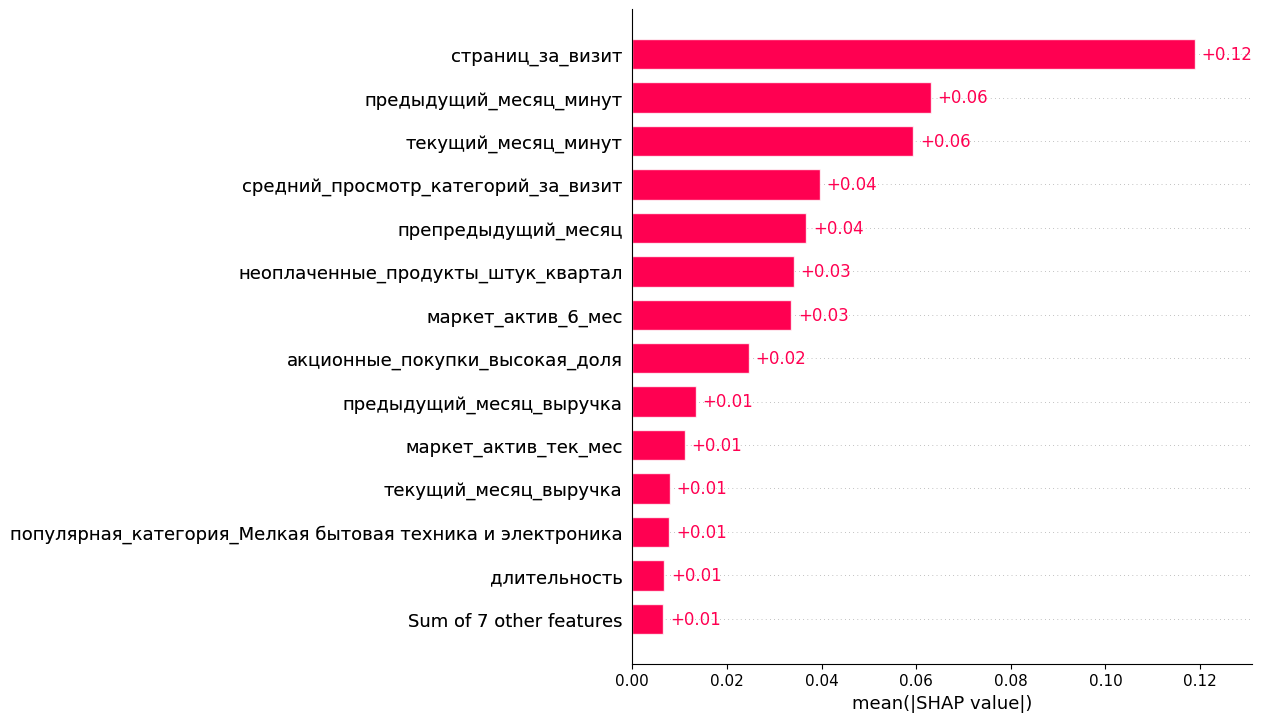

In [86]:
shap.plots.bar(explanation, max_display=14)

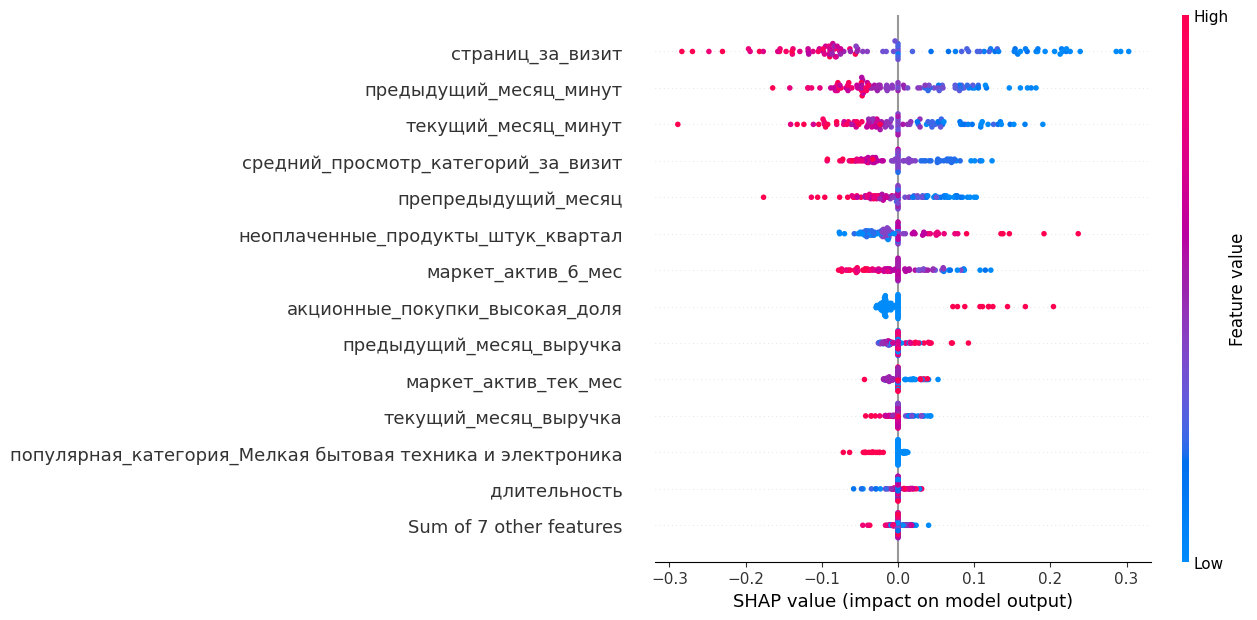

In [87]:
shap.plots.beeswarm(explanation, max_display=14)

Список параметров оказывающих незначительное влияние на принятие моделью решения.
- 'текущий_месяц_выручка',
- 'разрешить_сообщать',
- 'популярная_категория',
- 'тип_сервиса',
- 'ошибка_сервиса'
  
Удалим их из исходных даных и проверим как изменится метрика лучшей модели

In [88]:
cols_to_remove = [
    'прибыль',
    'текущий_месяц_выручка',
    'разрешить_сообщать',
    'популярная_категория',
    'тип_сервиса',
    'ошибка_сервиса'
]

In [89]:
# Подготавливаем данные и создаем pipeline
df = df_market_merged.drop(cols_to_remove, axis=1)
X_train, X_test, y_train, y_test = split_data(df, 'покупательская_активность')
# создаём базовый пайплайн: подготовка данных и модель
pipeline = make_pipeline(X_train, X_test, y_train, y_test)


In [90]:
# обучаем моледи и выбираем лучшую
randomized_search_сut = RandomizedSearchCV(
    pipeline, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1,
    n_iter=50
)
randomized_search_сut.fit(X_train, y_train_encoded)

print(f'Лучшая модель и её параметры: \n {randomized_search.best_params_} \n')
print(f'Метрика ROC_AUC лучшей модели на тренировочной выборке:' 
      f'{randomized_search.best_score_}')

Лучшая модель и её параметры: 
 {'preprocessor__num': StandardScaler(), 'models__kernel': 'rbf', 'models__degree': 3, 'models': SVC(probability=True, random_state=42)} 

Метрика ROC_AUC лучшей модели на тренировочной выборке:0.9090482044027499


In [91]:
y_test_pred = randomized_search_сut.best_estimator_.predict_proba(X_test)[:,1]
y_test_encoded = label_encoder.transform(y_test)
print(f'Метрика ROC_AUC на тестовой выборке: '
      f'{roc_auc_score(y_test_encoded, y_test_pred)}')

Метрика ROC_AUC на тестовой выборке: 0.9015087165797032


удаление признаков практически не повлияло на качество модели.

Наиболее значимые признаки:
1. страниц_за_визит, 
2. предыдущий_месяц_минут,
3. текущий_месяц_минут,
4. средний_просмотр_категорий_за_визит
* все эти патаметры можно обобщить как - чем больше смотрят страниц и минут, тем меньше вероятнось снижения покупательской активности

5. неоплаченные_продукты_штук_квартал,
6. акционные_покупки,
* увеличение этих признаков - напротив увеличивает вероятность снижения активности.

  Если цель - поддержание уровня покупательской активности - то заказчику можно порекомендовать:
  1. сделать такой интерфейс, чтобы пользователи как можно больше проводили времени на сайте просматривая товары.
  2. перевести покупателей с высокой доле покупок по акции в низкую,
  3. уменьшиь количество неоплаченных покупок, например введя рпедоплату
  4. или компенсировать отрицательный эффект улучшение признаков с положительным влиянием.

## Сегментация покупателей

Выделим сегмент по двум переменным: вероятность снижения покупательской актисности `вероятность_сниженя` и `прибыль`.
Порог вероятноси установим 0.8 именно за ним сконцентрирована вероятность снижения, а порог прибыли 3 -  так как большая чась прибыли при ее распределении близком к нормальному, находится выше этой границы


### Графическое и аналитическое исследование группы покупателей.

Исследуем Группу клиентов с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности

Сгруппируем данные по Акцонные покупки высокая доля и посмотрим на средндд выручку и прибыль

Сегментацию сделаена тестовых данных так как для них у нас уже есть предсказанная вероятность

Получим вероятности для всего датафрейма

In [92]:
y_test_pred_all = randomized_search.best_estimator_.predict_proba(
    df_market_merged.drop(
        ['прибыль', 'покупательская_активность'], axis=1
    )
)[:,1]

In [93]:
df_market_merged_proba = df_market_merged.copy()
df_market_merged_proba['вероятность_снижения'] = y_test_pred_all

In [94]:
df_market_merged_proba.head()

,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,акционные_покупки_высокая_доля,предыдущий_месяц_выручка,препредыдущий_месяц,текущий_месяц_выручка,предыдущий_месяц_минут,текущий_месяц_минут,прибыль,вероятность_снижения
id,,,,,,,,,,,,,,,,,,,
215349,Снизилась,премиум,да,4.4000,4,819,Товары для детей,4,4,2,5,1,5_216.0000,4_472.0000,4_971.6000,12,10,4.1600,0.9697
215350,Снизилась,стандарт,нет,4.9000,3,539,Домашний текстиль,5,2,1,5,0,5_457.5000,4_826.0000,5_058.4000,8,13,3.1300,0.5978
215351,Снизилась,стандарт,да,3.2000,5,896,Товары для детей,5,0,6,4,1,6_158.0000,4_793.0000,6_610.4000,11,13,4.8700,0.7599
215352,Снизилась,стандарт,нет,5.1000,3,1064,Товары для детей,3,2,3,2,1,5_807.5000,4_594.0000,5_872.5000,8,11,4.2100,0.9384
215353,Снизилась,стандарт,да,3.3000,4,762,Домашний текстиль,4,1,1,4,0,4_738.5000,5_124.0000,5_388.5000,10,10,3.9500,0.8107


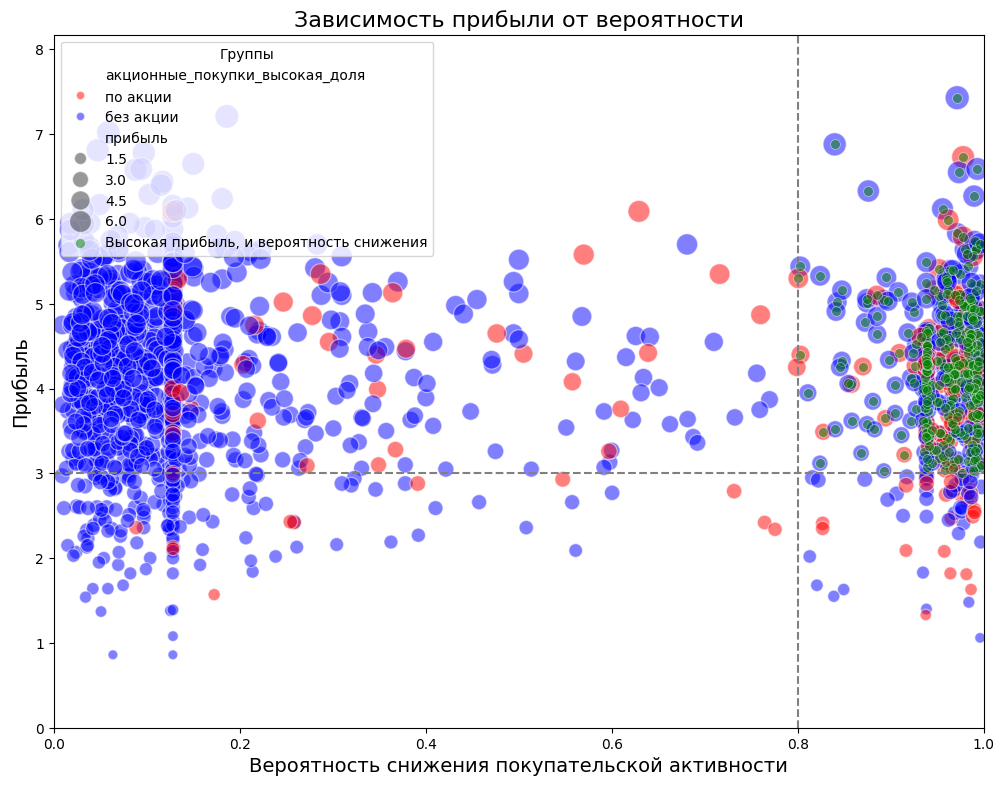

In [95]:
# Сначала преобразуем значения столбца в нужные названия
df_chart = df_market_merged_proba.copy()
df_chart['акционные_покупки_высокая_доля'] = (
    df_market_merged_proba['акционные_покупки_высокая_доля'].map({
    0: 'без акции',
    1: 'по акции'
    })
)

# Создаем фигуру с более крупным размером
plt.figure(figsize=(12, 9))

# Определяем линии разделения
profit_threshold = 3
proba_threshold = 0.8

# Создаем базовый scatter plot для всех точек
sns.scatterplot(
    x='вероятность_снижения',
    y='прибыль',
    hue='акционные_покупки_высокая_доля',
    size='прибыль',
    palette={
        'без акции': 'blue',
        'по акции': 'red'
    },
    sizes=(50, 300),
    data=df_chart,
    alpha=0.5
)

# Выделяем точки выше и правее порогов
sns.scatterplot(
    x='вероятность_снижения',
    y='прибыль',
    data=df_chart[
        (df_chart['прибыль'] > profit_threshold) &
        (df_chart['вероятность_снижения'] > proba_threshold)
    ],
    color='green',
    alpha=0.5,
    s=50,
    label='Высокая прибыль, и вероятность снижения'
)

# Добавляем линии разделения
plt.axhline(profit_threshold, color='gray', linestyle='--')
plt.axvline(proba_threshold, color='gray', linestyle='--')

# Настраиваем оси
plt.xlim(0, 1)
plt.ylim(0, df_chart['прибыль'].max() * 1.1)

# Настраиваем подписи и заголовок
plt.xlabel('Вероятность снижения покупательской активности', fontsize=14)
plt.ylabel('Прибыль', fontsize=14)
plt.title('Зависимость прибыли от вероятности', fontsize=16)

# Настраиваем легенду
plt.legend(title='Группы', loc='upper left', fontsize=10)

plt.show()


В выбранном сегменте снавним показатели по наиболее значимым критериям по порядку важности признаков

In [96]:
def plot_combined_bar(df, column_name):
    # Создаем фигуру с общей осью
    fig, ax = plt.subplots(figsize=(10, 6))

    segment = df.query('прибыль > 3 and вероятность_снижения > 0.8')
    out_of_segment = df.query('прибыль <= 3 and вероятность_снижения <= 0.8')
    
    # Получаем значения для обоих датафреймов
    counts1 = segment[column_name].value_counts().sort_index()
    counts2 = out_of_segment[column_name].value_counts().sort_index()
    
    # Рисуем первый график
    counts1.plot(
        kind='bar',
        ax=ax,
        color='blue',
        alpha=0.6,
        label='Сегмент')
    
    # Рисуем второй график поверх первого
    counts2.plot(
        kind='bar',
        ax=ax,
        color='green',
        alpha=0.6,
        label='Вне сегмента')
    
    # Настраиваем легенду
    ax.legend(title='Группы', fontsize=10)
    
    # Настраиваем оси
    ax.set_xlabel(f'Значение {column_name}')
    ax.set_ylabel('Количество')
    ax.set_title(f'Сравнение распределений {column_name}',
                 fontweight='bold', fontsize=14)
    
    # Добавляем сетку
    ax.grid(axis='y', alpha=0.3)
    
    # Показываем график
    plt.tight_layout()
    plt.show()
    

In [97]:
def plot_combined_hist(df, column_name):
    # Создаем фигуру с общей осью
    fig, ax = plt.subplots(figsize=(10, 6))

    segment = df.query('прибыль > 3 and вероятность_снижения > 0.8')
    out_of_segment = df.query('прибыль <= 3 and вероятность_снижения <= 0.8')
    
    # Рисуем гистограмму для первой группы
    segment[column_name].plot(
        kind='hist', 
        ax=ax, 
        color='blue', 
        alpha=0.6, 
        label='Сегмент',
        bins=20,
        density=True
    )
    
    # Рисуем гистограмму для второй группы
    out_of_segment[column_name].plot(
        kind='hist', 
        ax=ax, 
        color='green', 
        alpha=0.6, 
        label='Вне сегмента',
        bins=20,
        density=True
    )
    
    # Настраиваем легенду
    ax.legend(title='Группы', fontsize=10)
    
    # Настраиваем оси
    ax.set_xlabel(f'Значение {column_name}')
    ax.set_ylabel('Плотность вероятности')
    ax.set_title(f'Сравнение распределений {column_name}', 
                fontweight='bold', fontsize=14)
    
    # Добавляем сетку
    ax.grid(axis='y', alpha=0.3)
    
    # Показываем график
    plt.tight_layout()
    plt.show()


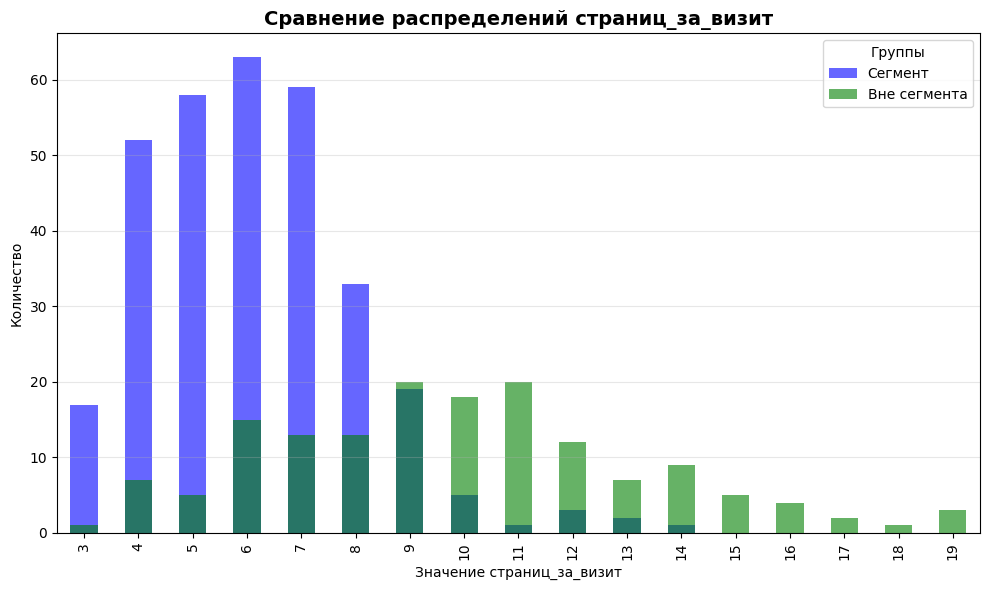

In [98]:
plot_combined_bar(df_market_merged_proba, 'страниц_за_визит')

в Сегменте распределение по количеству страниц сильно смещено влево

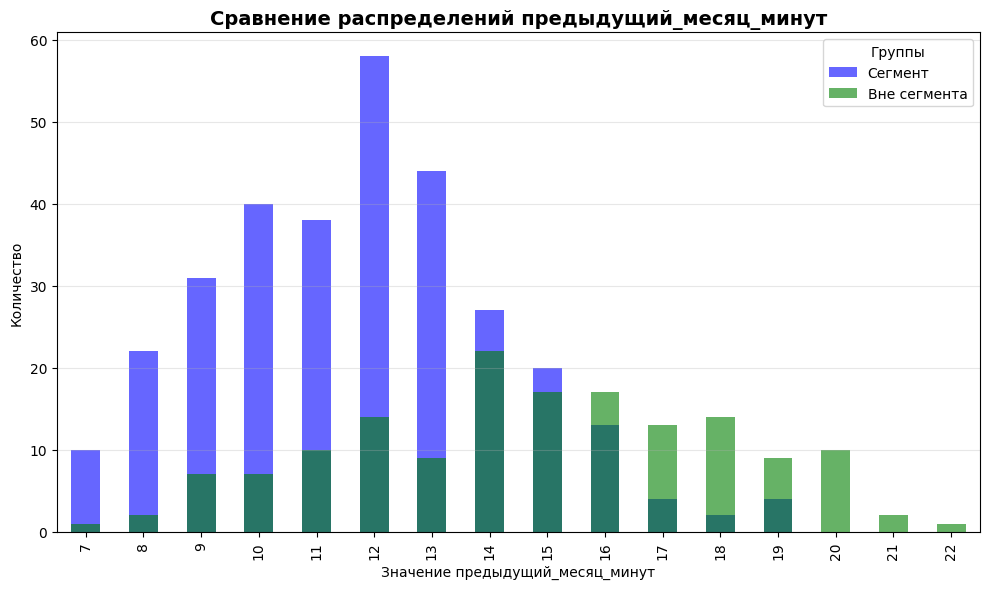

In [99]:
plot_combined_bar(df_market_merged_proba, 'предыдущий_месяц_минут')

в Сегменте колличество минут за предыдущий месяц смещено влево

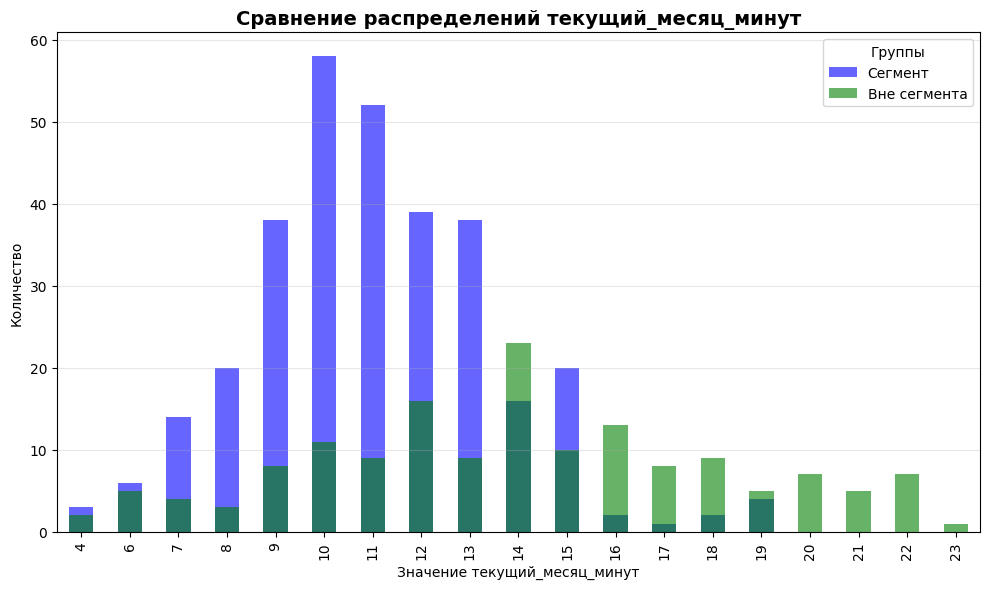

In [100]:
plot_combined_bar(df_market_merged_proba, 'текущий_месяц_минут')

Распределение так же смещено влево

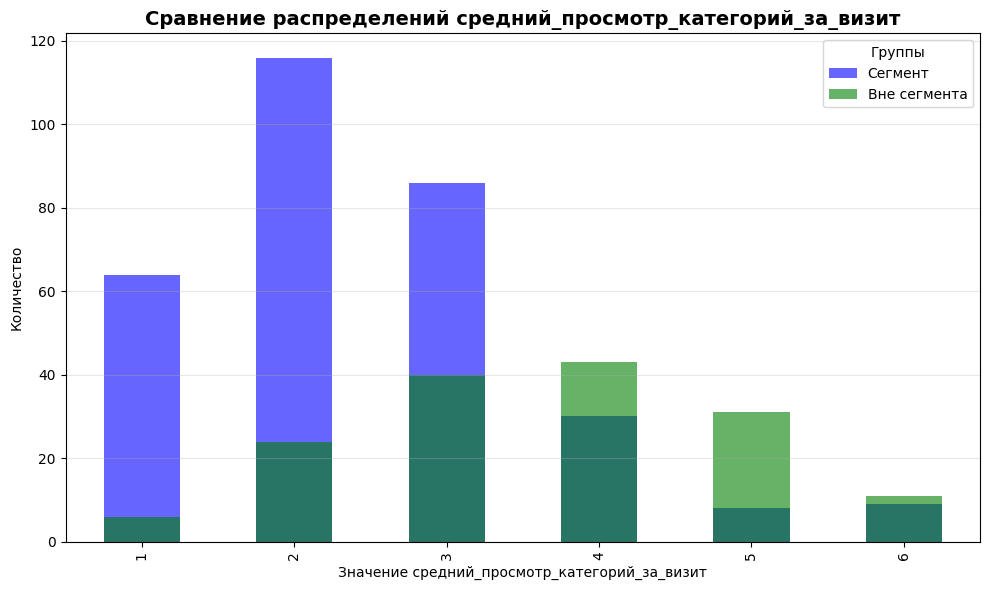

In [101]:
plot_combined_bar(df_market_merged_proba, 'средний_просмотр_категорий_за_визит')

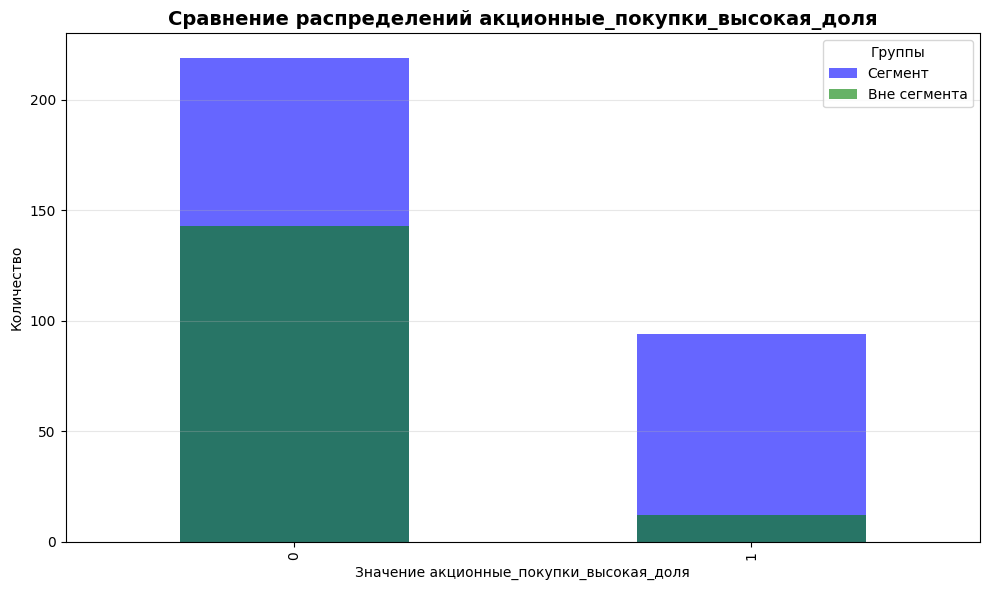

In [102]:
plot_combined_bar(df_market_merged_proba, 'акционные_покупки_высокая_доля')

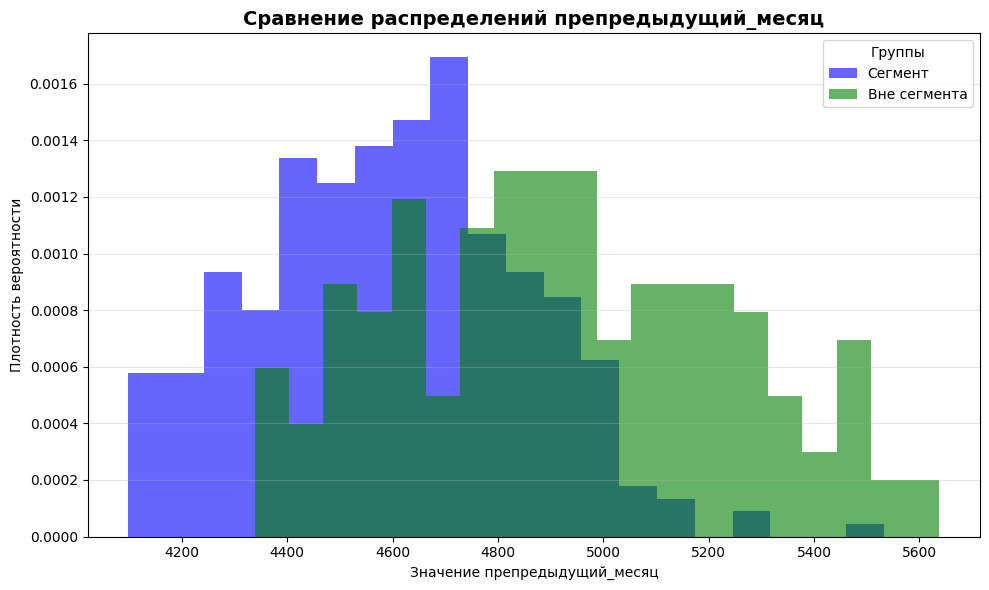

In [103]:
plot_combined_hist(df_market_merged_proba, 'препредыдущий_месяц')

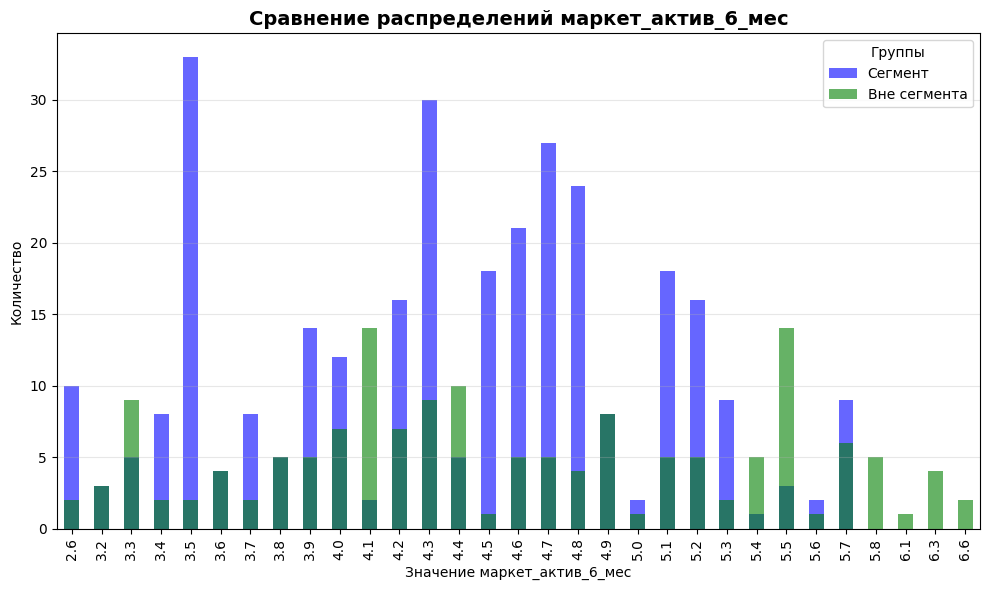

In [104]:
plot_combined_bar(df_market_merged_proba, 'маркет_актив_6_мес')

Здесь в Сегменте видем больше маркетинговой активности чем вне сегмента

Среди покупателей любящих у акции большей частьи пользователей снижается покупательская активность.

Построми водопаты по пяти объяснениям с наибольшим отрицательным влиянием признака `акционные_покупки_высокая_доля`

In [105]:
# Обернем shap_values в датафрейм, чтобы выбрать строки с наибольшим 
# влинянием признака 'акционные_покупки_высокая_доля'
shap_values_df = pd.DataFrame(shap_values_sample[:, :, 1],
                              columns=feature_names)
promo_hi_share = shap_values_df.sort_values(
    by='акционные_покупки_высокая_доля').index.tolist()[:5]

акционные_покупки_высокая_доля:-0.02871500041994415


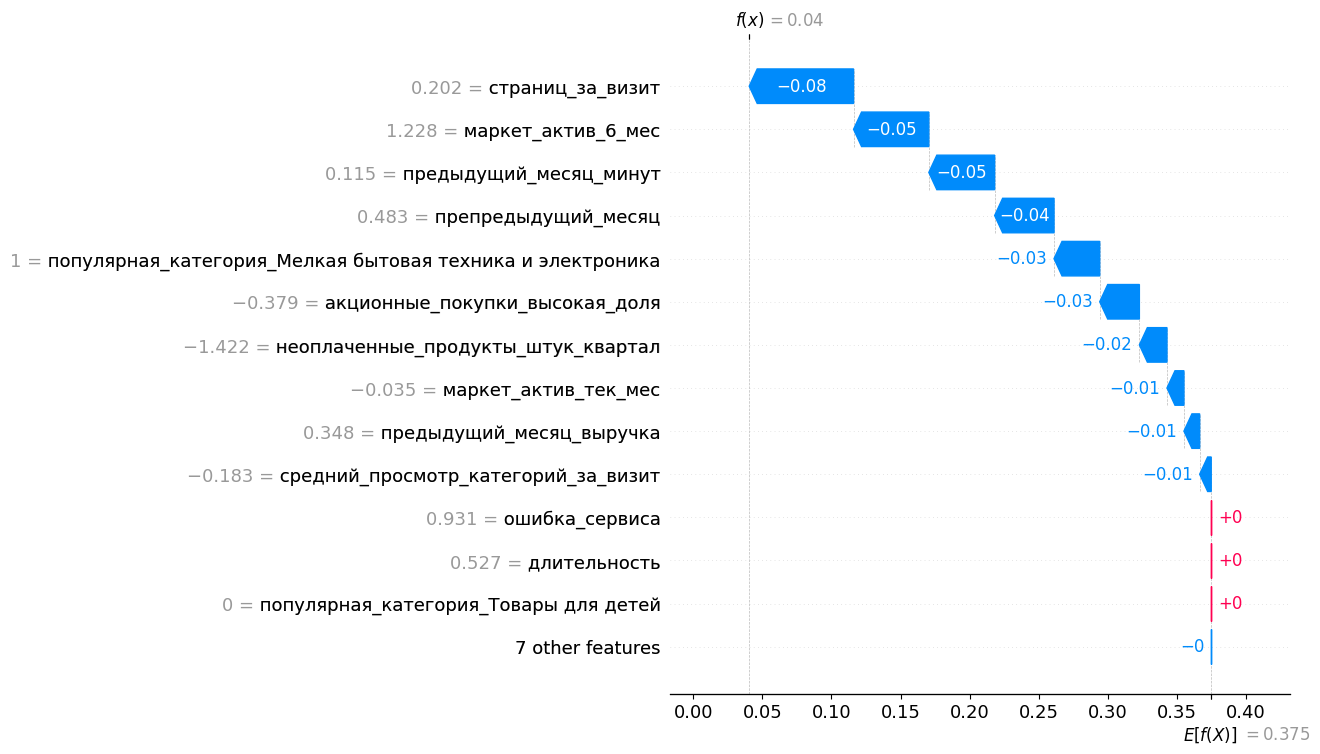

акционные_покупки_высокая_доля:-0.028372574223820782


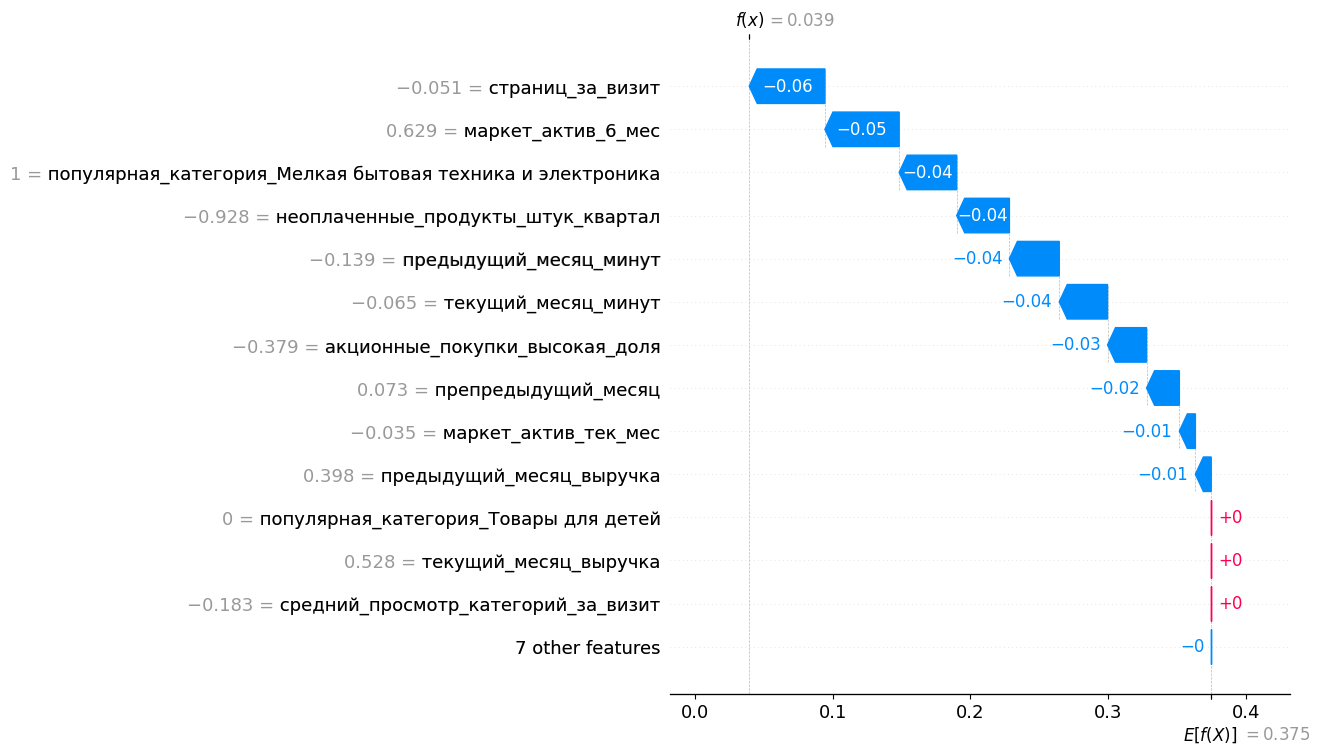

акционные_покупки_высокая_доля:-0.027775387260520208


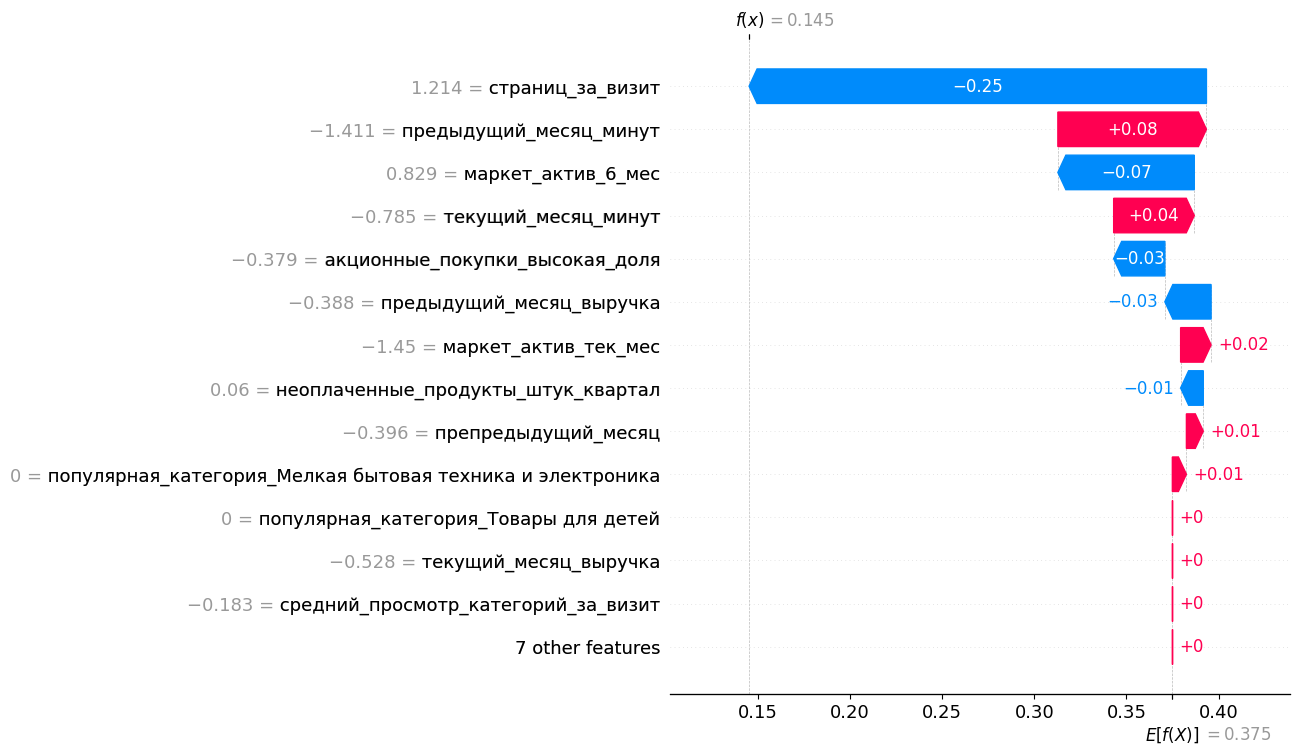

акционные_покупки_высокая_доля:-0.02552145973328592


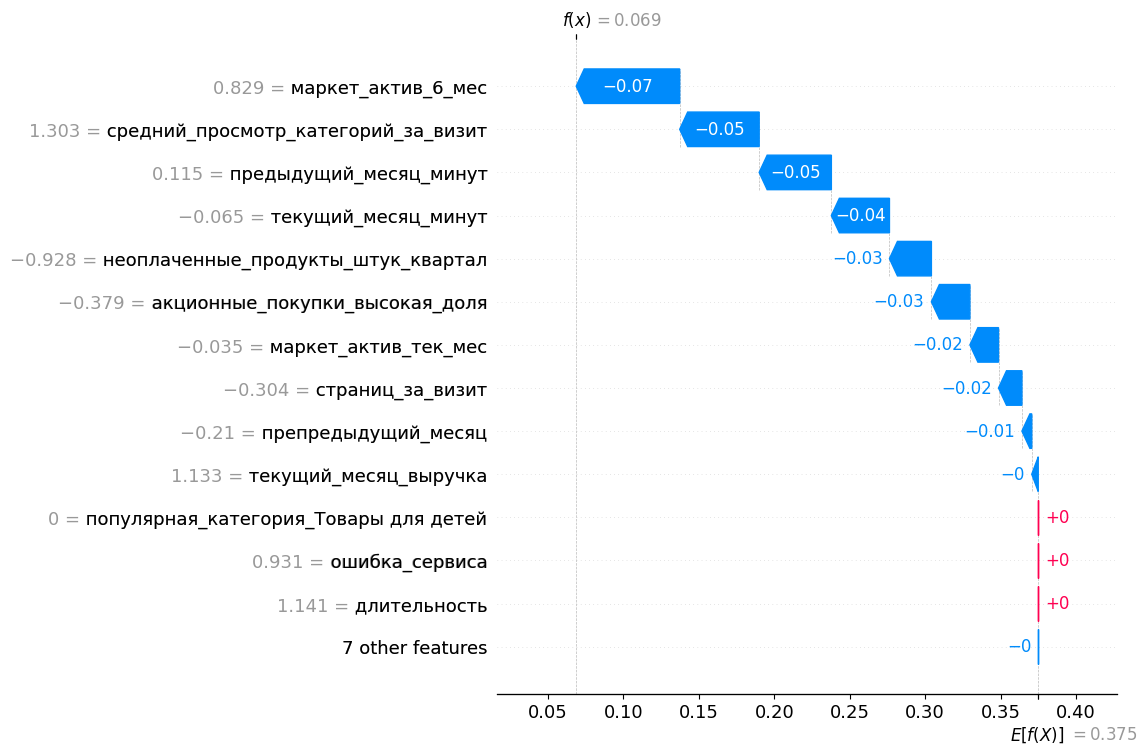

акционные_покупки_высокая_доля:-0.024906348645443246


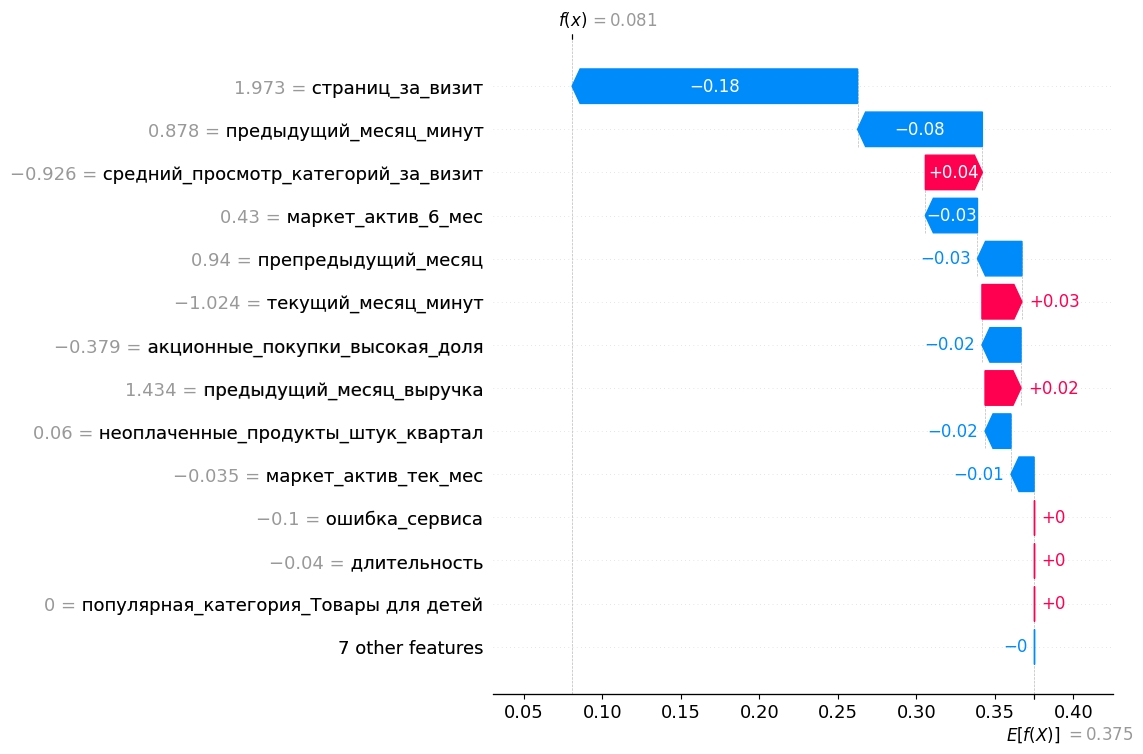

In [106]:
for i in promo_hi_share:
    print(f'акционные_покупки_высокая_доля:'
          f'{shap_values_df.loc[i]["акционные_покупки_высокая_доля"]}')
    shap.plots.waterfall(explanation[i], max_display=14)

Во всех рассмотренных примерах где доля акционные_покупки_высокая_доля максимальна - этот фактор не является решающим. Гораздо большее занчение имеет время проведенное на сайте и количество просмотренных страниц которые во много раз перекрывают отрицателое влияние акций. В свою очередь акции позволяют увеличить выручку магазина при не значительном снижении прибыли.

### Предложения по работе с сегментом для увеличения покупательской активности.

1. По всем важным для поддержания покупательской активности критериям в расстмотренном сегменте с высокой прибылью и высокой вероятностю снижения активности наблюдается смещение вправо. Т.е. покупатели из сегмента проводят меньше времени на сайте смотрят меньше страниц меньше категорий. При этом в сегменте наблюдается повышенная маркетинговая активность.
2. Если акции полезны для бизнеса с точки зрения увеличения выручки, комненсировать их незначительное отрицательное влияние на покупательскую активность можно за счет других более влиятельных факторов.

Бизнесу можно дать следующие рекомендации: Состедоточется на увеличение времени проводимом на сайте и колличестве просмотренных страниц. Привести маркетинговую активность в отношении Сегмента к средним значениям.

## Общий вывод

- Была поставлена задача:  разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.

- Полученные от заказчика данные в целом соответстуют описанию, но нужно было исправить некорорые названия столбцов df_market и разделитель десятичных значений в df_money и преобразовать типы. Пропусков в данных нет.
Явные дубликаты в датафреймах отсутствуют.

в столбце `акционные_покупки` явно выделись 2 категории 
категоризировали `признак акционные_покупк` был добавлен солбец акционные_покупки_высокая_доля границу разбиения PROMO_THRESHOLD установим 0.5

- Был проведен исследовательский акализа данных :
В выручке обранужены  выбросы. Нулевое значение и заказ на 106 тысячь - их решено не удалять

- Таблицы были объединены в один датафрем для последующей работы с ним

- Корреляционный анализ показал, что высоких корреляций (0.9 +) не видно, скорее всего мультиколлинеарности нет. Подозрения на нелинейнось зависимостей не выявлено

- Построина матрица корредяций по всем(колличественным и категориальным) признакам для этого применена phik_matrix из библиотеки phik

- Для выбора лучшей модели и ее настроек прменены пайплайны.
Во время подготовки данных  использовався ColumnTransformer. Количественные и категориальные признаки обработаны в пайплайне раздельно. Для кодирования категориальных признаков использовано два кодировщика, для масштабирования количественных —два скейлера. Отдельно закодирована целевая переменная

Обучено четыре модели: KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression() и SVC(). Для каждой из них подобраны  гиперпараметры. Используя метрику ROC_AUC выбрана лучьщая модель  при помощи общего пайплайна.

Лучшая модель и её параметры: 
 {'preprocessor__num': StandardScaler(), 'models__kernel': 'rbf', 'models__degree': 3, 'models': SVC(probability=True, random_state=42)} 

- Метрика ROC_AUC лучшей модели на тренировочной выборке:0.9175520115156479
- Метрика ROC_AUC на тестовой выборке: 0.9065559300272831

Метрика на тестовой выборке немного хуже чем на тренеровочной. Но вряд ли можно сказать о том, что модель переобучена. Кроме того ROC_AUC на тестовых данный выше чем средние ROC_AUC на тренеровочных данных для второй по качеству модели.

- Проведен анализ важности признаков

Проведено сравнение с моделью на уменьшенном наборе признаков удаление признаков практически не повлияло на качество модели.

Список параметров оказывающих незначительное влияние на принятие моделью решения.
1. текущий_месяц_выручка,
2. разрешить_сообщать,
3. популярная_категория,
4. тип_сервиса,
5. ошибка_сервиса

Наиболее значимые признаки:
1. страниц_за_визит,
2. предыдущий_месяц_минут,
3. текущий_месяц_минут,
4. средний_просмотр_категорий_за_визит

все эти патаметры можно обобщить как - чем больше смотрят страниц и минут, тем меньше вероятнось снижения покупательской активности

1. неоплаченные_продукты_штук_квартал,
2. акционные_покупки,
   
увеличение этих признаков - напротив увеличивает вероятность снижения активности.
Если цель - поддержание уровня покупательской активности - то заказчику можно порекомендовать:

1. сделать такой интерфейс, чтобы пользователи как можно больше проводили времени на сайте просматривая товары.
2. перевести покупателей с высокой доле покупок по акции в низкую,
3. уменьшиь количество неоплаченных покупок, например введя рпедоплату
4. или компенсировать отрицательный эффект улучшение признаков с положительным влиянием.

Исходя из имеющихся данных провели сегментнацию покупателей по следующим критериям:

1. Покупательская активность
2. Маркетинговая активность
3. Акцонные покупки

Исследовали группу клиентов с максимальной долей покупок по акции и высокой вероятностью снижения покупательской активности

Вывод: 
1. По всем важным для поддержания покупательской активности критериям в расстмотренном сегменте с высокой прибылью и высокой вероятностю снижения активности наблюдается смещение вправо. Т.е. покупатели из сегмента проводят меньше времени на сайте смотрят меньше страниц меньше категорий. При этом в сегменте наблюдается повышенная маркетинговая активность.
2. Если акции полезны для бизнеса с точки зрения увеличения выручки, комненсировать их незначительное отрицательное влияние на покупательскую активность можно за счет других более влиятельных факторов.

Бизнесу можно дать следующие рекомендации:
Состедоточется на увеличение времени проводимом на сайте и колличестве просмотренных страниц. Привести маркетинговую активность в отношении Сегмента к средним значениям.